# Prepare dataset

## EU-ETS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1071 non-null   datetime64[ns]
 1   Cprice      1071 non-null   float64       
 2   Eprice      1071 non-null   float64       
 3   BrentOil    1071 non-null   float64       
 4   CrudeOilF   1071 non-null   float64       
 5   TTF-NatGas  1071 non-null   float64       
 6   NatGasF     1071 non-null   float64       
 7   Coal        1071 non-null   float64       
 8   GasolineF   1071 non-null   float64       
 9   DJI         1071 non-null   float64       
 10  S&P500      1071 non-null   float64       
 11  USD-EUR     1071 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 100.5 KB
None
        Date  Cprice     Eprice  BrentOil  CrudeOilF  TTF-NatGas  NatGasF  \
0 2018-07-09   15.85  50.688929     78.07      73.85      22.730    2.828   


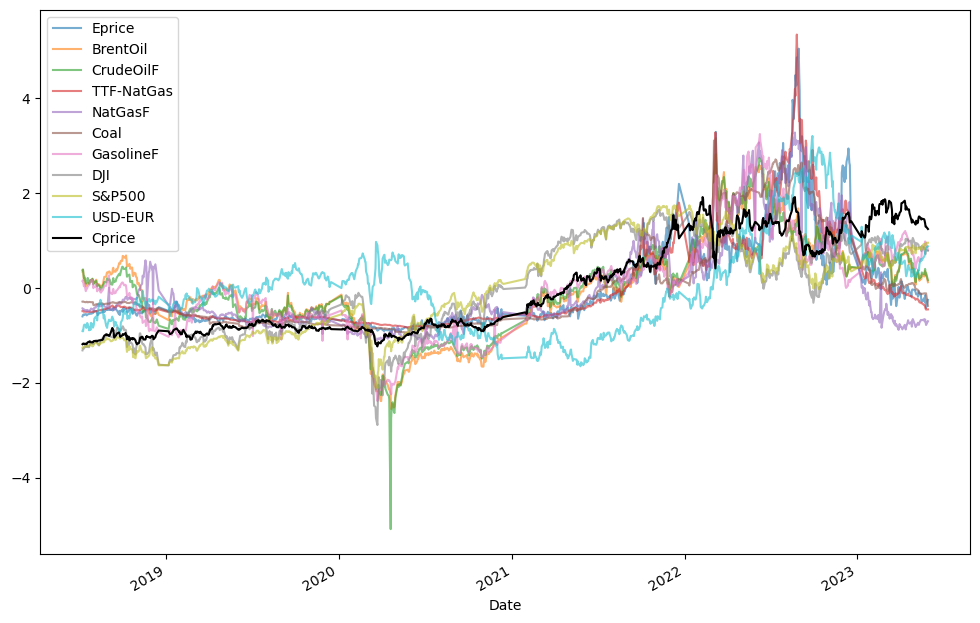

In [1]:
from Preprocess import *

import warnings
warnings.simplefilter(action='ignore')
df_eu = prepare_eu(save=False, vis=True)


<AxesSubplot:>

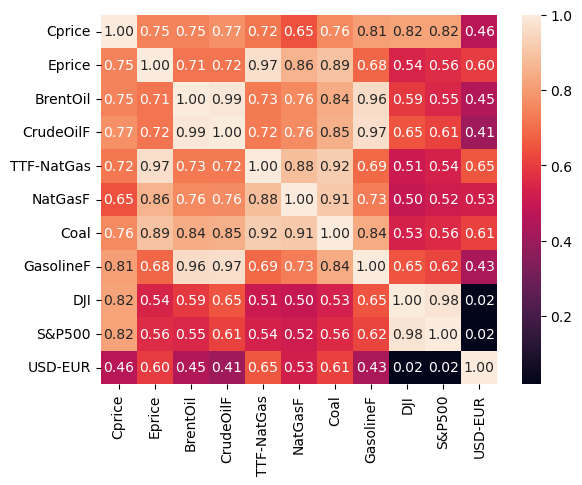

In [2]:
import seaborn as sns
sns.heatmap(df_eu.corr(), annot=True, fmt=".2f")

<AxesSubplot:>

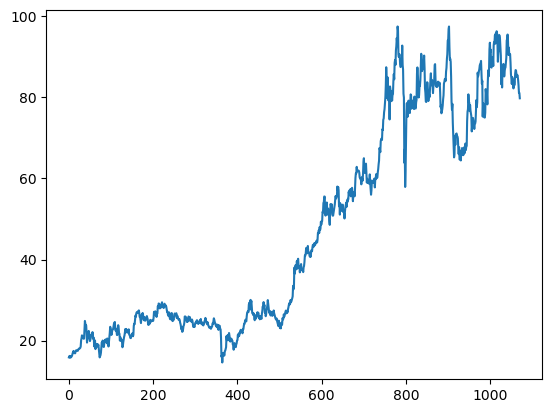

In [3]:
df_eu['Cprice'].plot()

>>> orig series <<<
Results of Dickey-Fuller Test:
Test Statistic                   -0.730754
p-value                           0.838622
#Lags Used                       13.000000
Number of Observations Used    1057.000000
Critical Value (1%)              -3.436552
Critical Value (5%)              -2.864278
Critical Value (10%)             -2.568228
dtype: float64


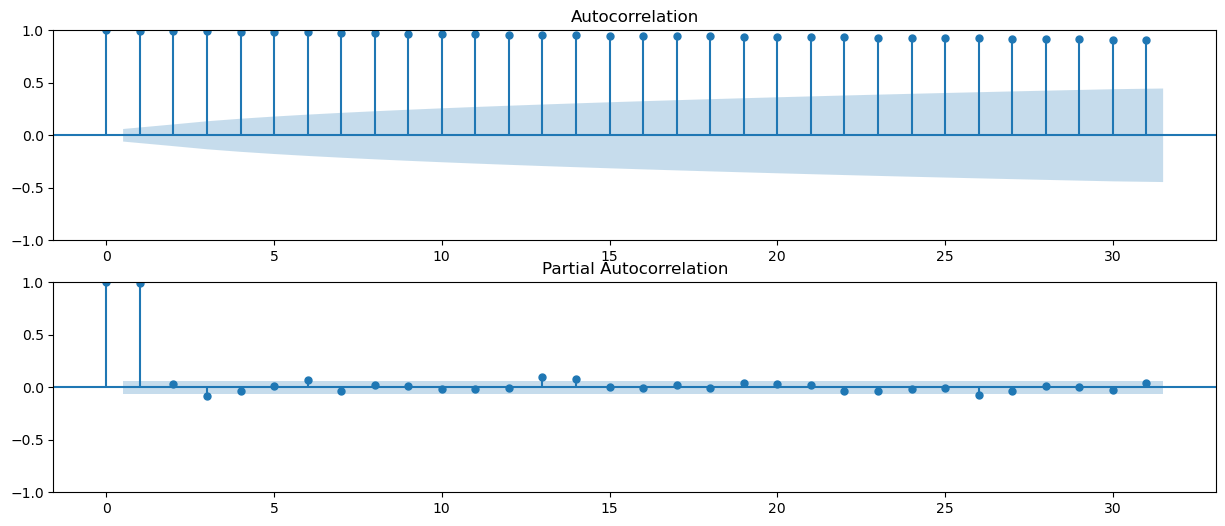

>>> diff(1) <<<
Results of Dickey-Fuller Test:
Test Statistic                -1.096987e+01
p-value                        7.930026e-20
#Lags Used                     1.200000e+01
Number of Observations Used    1.057000e+03
Critical Value (1%)           -3.436552e+00
Critical Value (5%)           -2.864278e+00
Critical Value (10%)          -2.568228e+00
dtype: float64


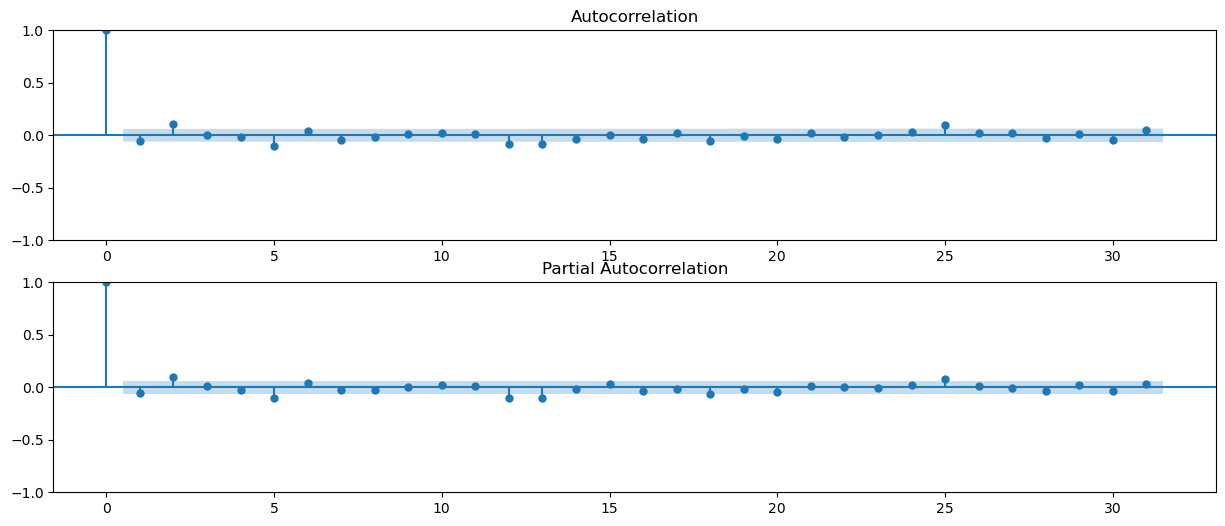

In [4]:
from sarimax import *
endog = np.array(df_eu['Cprice'])
### Test for stationary
print('>>> orig series <<<')
ADF_ACF_PACF(endog)
print('>>> diff(1) <<<')
ADF_ACF_PACF(np.diff(endog.reshape(-1)))


## China-ETS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1324 non-null   datetime64[ns]
 1   Guangzhou       1324 non-null   float64       
 2   Hubei           1324 non-null   float64       
 3   Shanghai        1324 non-null   float64       
 4   Beijing         1324 non-null   float64       
 5   Fujian          1324 non-null   float64       
 6   Chongqing       1324 non-null   float64       
 7   Tianjin         1324 non-null   float64       
 8   Shenzhen        1324 non-null   float64       
 9   EU-CC           1324 non-null   float64       
 10  WTI-Oil         1324 non-null   float64       
 11  Brent-Oil       1324 non-null   float64       
 12  Zhengzhou-Coal  1324 non-null   float64       
 13  Dalian-Coal     1324 non-null   float64       
 14  Rtd-Coal        1324 non-null   float64       
 15  US-N

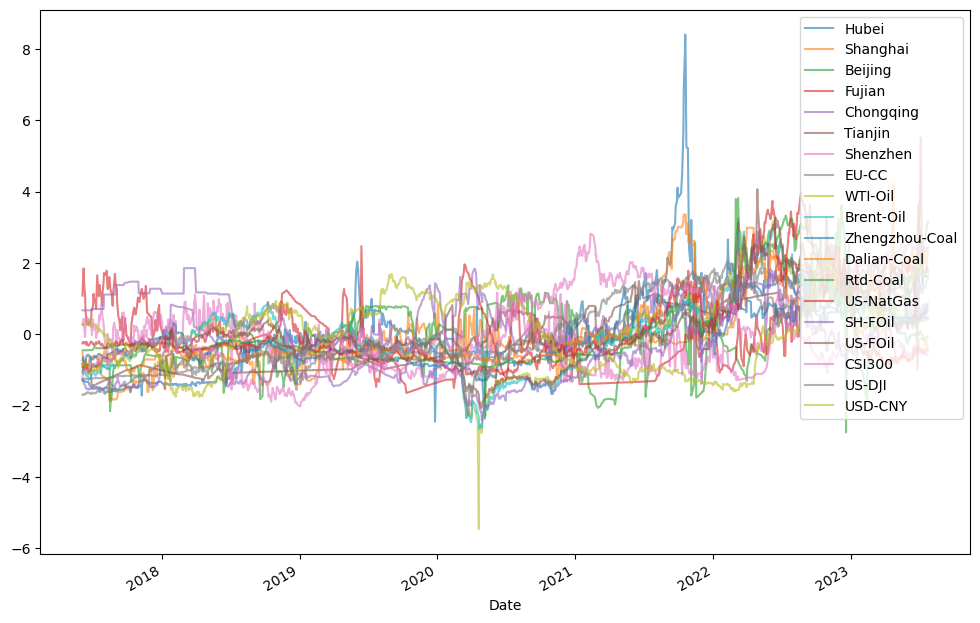

In [1]:
from Preprocess import *

df_chn = prepare_chn(save=False, vis=True)
df_chn.set_index('Date', inplace=True)

<AxesSubplot:>

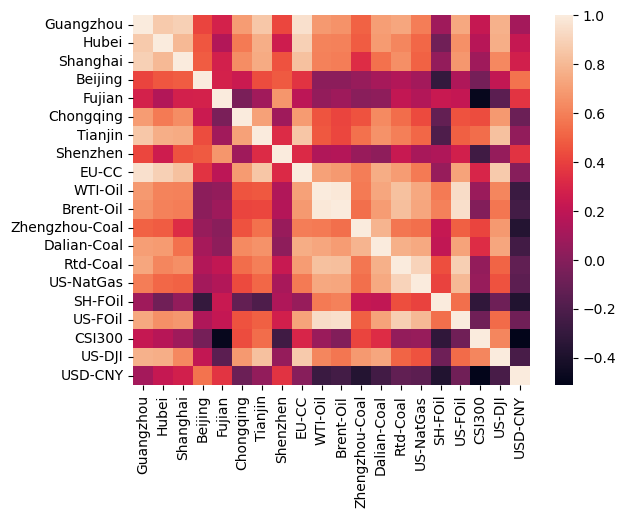

In [2]:
import seaborn as sns
sns.heatmap(df_chn.corr(), annot=False, fmt=".2f")

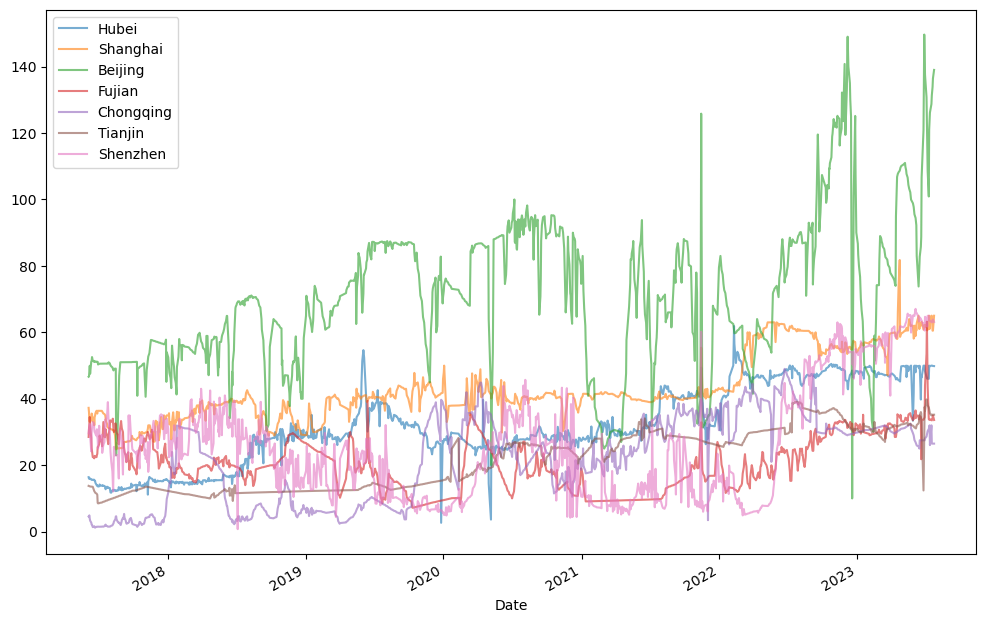

In [3]:
markets = ['Guangzhou', 'Hubei', 'Shanghai', 'Beijing', 'Fujian', 'Chongqing', 'Tianjin', 'Shenzhen']
df_norm = df_chn[markets]
# df_norm = (df_norm - df_norm.mean()) / df_norm.std()
df_norm.iloc[:,1:].plot(figsize=(12,8), x_compat=True, alpha=0.6)
plt.show()

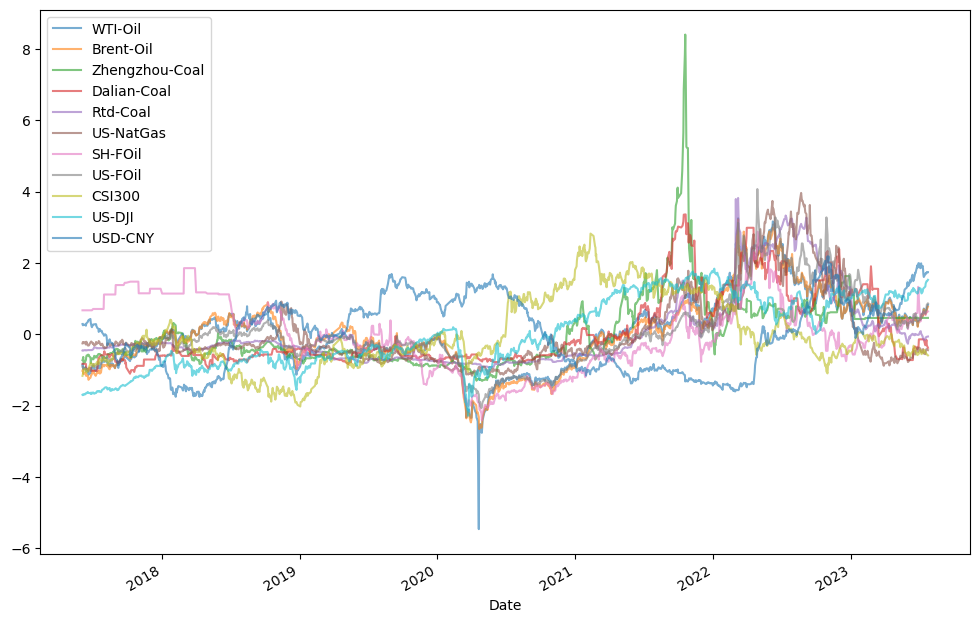

In [4]:
Xcols = ['EU-CC', 'WTI-Oil', 'Brent-Oil', 'Zhengzhou-Coal', 'Dalian-Coal', 'Rtd-Coal', 'US-NatGas', 'SH-FOil', 'US-FOil', 'CSI300', 'US-DJI', 'USD-CNY']
df_norm = df_chn[Xcols]
df_norm = (df_norm - df_norm.mean()) / df_norm.std()
df_norm.iloc[:,1:].plot(figsize=(12,8), x_compat=True, alpha=0.6)
plt.show()

In [8]:
# orig data (no interpolation)
df_chn1 = pd.read_excel('data/df_chn.xlsx', sheet_name='df-chn')
df_chn1 = df_chn1[ df_chn1['Date'] >= pd.to_datetime('20170605') ]
df_chn1.info()
df_chn1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324 entries, 132 to 1455
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      1324 non-null   int64         
 1   Date            1324 non-null   datetime64[ns]
 2   Guangzhou       896 non-null    float64       
 3   Hubei           899 non-null    float64       
 4   Shanghai        631 non-null    float64       
 5   Beijing         498 non-null    float64       
 6   Fujian          525 non-null    float64       
 7   Chongqing       454 non-null    float64       
 8   Tianjin         244 non-null    float64       
 9   Shenzhen        886 non-null    float64       
 10  EU-CC           1291 non-null   float64       
 11  WTI-Oil         1299 non-null   float64       
 12  Brent-Oil       1298 non-null   float64       
 13  Zhengzhou-Coal  1306 non-null   float64       
 14  Dalian-Coal     1307 non-null   float64       
 15  Rt

Unnamed: 0   Guangzhou       Hubei    Shanghai     Beijing  \
count  1324.000000  896.000000  899.000000  631.000000  498.000000   
mean    793.500000   35.689121   30.062823   43.828545   72.689016   
std     382.350189   25.399885   12.235079   10.459432   23.652993   
min     132.000000    1.270000    2.660000   24.750000   10.000000   
25%     462.750000   14.590000   16.690000   37.285000   53.977500   
50%     793.500000   26.580000   28.720000   40.500000   71.055000   
75%    1124.250000   45.642500   40.675000   54.875000   87.192500   
max    1455.000000   95.600000   61.890000   81.780000  149.640000   

           Fujian   Chongqing     Tianjin    Shenzhen        EU-CC  ...  \
count  525.000000  454.000000  244.000000  886.000000  1291.000000  ...   
mean    22.712724   18.009031   24.759344   26.560475    40.001758  ...   
std      6.981629   13.750997    7.420893   15.616357    27.826551  ...   
min      7.190000    1.200000    8.510000    0.760000     5.160000  ...   
25%     17.730000    4.600000   19.000000   13.152500    21.060000  ...   
50%     21.240000   16.245000   26.000000   25.509000    27.170000  ...   
75%     28.530000   30.812500   30.000000   34.026250    63.385000  ...   
max     63.190000   49.000000   39.800000   67.060000    98.010000  ...   

         Brent-Oil  Zhengzhou-Coal  Dalian-Coal     Rtd-Coal    US-NatGas  \
count  1298.000000     1306.000000  1307.000000  1295.000000  1299.000000   
mean     68.359584      713.959265  1711.513772   115.903475     3.377390   
std      18.436262      188.998888   677.603205    83.890600     1.564804   
min      19.330000      468.200000   963.000000    38.450000     1.552000   
25%      58.232500      591.800000  1261.500000    59.500000     2.518000   
50%      67.580000      645.200000  1368.000000    88.600000     2.859000   
75%      77.825000      801.400000  2068.750000   132.600000     3.674000   
max     127.980000     2301.600000  3995.000000   439.000000     9.647000   

           SH-FOil      US-FOil       CSI300        US-DJI      USD-CNY  
count  1292.000000  1298.000000  1307.000000   1261.000000  1307.000000  
mean   2877.363777     2.133006  4150.480933  28641.440206     6.731050  
std     778.296805     0.735375   585.065086   4404.854681     0.262643  
min    1016.000000     0.610400  2964.840000  18591.930000     6.269000  
25%    2401.000000     1.788150  3796.360000  25058.120000     6.481000  
50%    2850.000000     2.008500  3997.130000  27492.560000     6.749900  
75%    3431.000000     2.351225  4689.760000  33203.930000     6.940600  
max    5109.000000     5.135400  5807.720000  36799.650000     7.301500  

[8 rows x 21 columns]

# Load dataset

<AxesSubplot:xlabel='Date'>

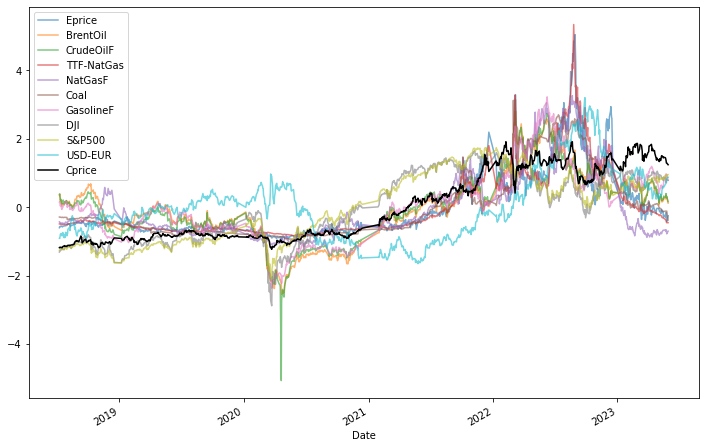

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('data/df_eu.xlsx', sheet_name='Sheet1')
df_norm = df.set_index('Date')
df_norm = (df_norm - df_norm.mean()) / df_norm.std()

dataY = df_norm['Cprice']
dataX = df_norm.iloc[:,1:]
dataX.plot(figsize=(12,8), x_compat=True, alpha=0.6)
dataY.plot(color='black', label='Cprice', legend=True)

<AxesSubplot:>

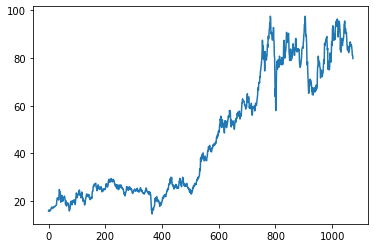

In [2]:
df['Cprice'].plot()

In [13]:
np.array(dataX).shape

(1074, 10)

# Load Data and helper functions

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2165 entries, 2013-01-07 00:00:00 to 2023-04-18 00:00:00
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2165 non-null   int64  
 1   C_Price         2165 non-null   float64
 2   C_Price_min     2165 non-null   float64
 3   C_Price_max     2165 non-null   float64
 4   C_Price_mean    2165 non-null   float64
 5   C_Price_median  2165 non-null   float64
 6   E_Price         1572 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 135.3 KB
None
            Unnamed: 0  C_Price  C_Price_min  C_Price_max  C_Price_mean  \
Date                                                                      
2013-01-07           0     6.18         5.75         6.50          6.10   
2013-01-08           1     6.35         5.19         6.56          6.26   
2013-01-10           2     5.93         4.00         6.25          5.87   
2013-01-11           

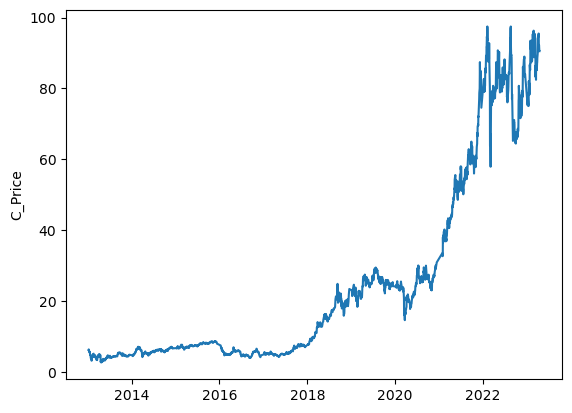

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import cal_rmse

# load data
df = pd.read_excel('data/CCprice.xlsx', sheet_name='Sheet1')
df = df.set_index('Date')
df.index = pd.DatetimeIndex(df.index)
df.index.freq = df.index.inferred_freq
date_col = df.index

# overview of data
print(df.info())
print(df.head())
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(date_col, df['C_Price'])
ax1.set_ylabel('C_Price')
plt.show()

y = np.array(df['C_Price'])
t = range(len(y))

In [2]:
def plot_sigs_and_spec(decomp_method, imfs, orig=None, res=None):

    norig = 1 if orig is not None else 0
    nres = 1 if res is not None else 0
    nrow = norig + len(imfs) + nres

    fig, axes = plt.subplots(nrow, 2, figsize=(10,10))

    # orig
    if orig is not None:
        # time
        ax = axes[0][0]
        ax.set_title(decomp_method)
        ax.plot(orig, 'r')
        ax.set_ylabel('orig')
        # freq
        ax = axes[0][1]
        ax.set_title('spectrum')
        yfft = np.fft.fftshift(np.fft.fft(orig))
        ax.plot(yfft, 'r')

    # imfs / modes / pfs
    for i in range(len(imfs)):
        # time
        ax = axes[i+norig][0]
        ax.plot(imfs[i], 'g')
        ax.set_ylabel('S%d' %(i+1))
        # freq
        ax = axes[i+norig][1]
        yfft = np.fft.fftshift(np.fft.fft(imfs[i]))
        ax.plot(yfft, 'g')

    # res
    if res is not None:  
        # time
        ax = axes[-1][0]
        ax.plot(res, 'g')
        ax.set_ylabel('res')
        # freq
        ax = axes[-1][1]
        yfft = np.fft.fftshift(np.fft.fft(res))
        ax.plot(yfft, 'g')

    ax = axes[-1][0]
    ax.set_xlabel("Time")
    ax = axes[-1][1]
    ax.set_xlabel("Freq")    

    plt.tight_layout()
    plt.show()
    return


# EMD++

Install PyEMD: `$ pip install EMD-signal`.

ATTENTION: `$ pip install pyemd` is not correct, `pyemd` is another package.

IMPORTANT!! After installation, go to `C:\Anaconda3\envs\torch37\Lib\site-packages`, change folder name from `pyemd` to `PyEMD`, then `import PyEMD`.

[PyEMD's doc](https://pyemd.readthedocs.io/en/latest/index.html)


Three variations of EMD is explored:

1. EMD (Empirical Mode Decomposition)

> N. E. Huang et al., “The empirical mode decomposition and the Hilbert spectrum for non-linear and non stationary time series analysis”, Proc. Royal Soc. London A, Vol. 454, pp. 903-995, 1998

2. EEMD (Ensemble Empirical Mode Decomposition)

> Z. Wu and N. E. Huang, “Ensemble empirical mode decomposition: A noise-assisted data analysis method”, Advances in Adaptive Data Analysis, Vol. 1, No. 1 (2009) 1-41.

3. CEEMDAN (Complete ensemble EMD with adaptive noise)

> M.E. Torres, M.A. Colominas, G. Schlotthauer, P. Flandrin A complete ensemble empirical mode decomposition with adaptive noise. Acoustics, Speech and Signal Processing (ICASSP), 2011, pp. 4144–4147

> M.A. Colominas, G. Schlotthauer, M.E. Torres, Improved complete ensemble EMD: A suitable tool for biomedical signal processing, In Biomed. Sig. Proc. and Control, V. 14, 2014, pp. 19–29

In [7]:
from PyEMD import EMD, EEMD, CEEMDAN, Visualisation
from PyEMD.compact import filt6, pade6
from scipy.signal import hilbert

In [4]:
emd = EMD()
emd.emd(y)
imfs_emd, res_emd = emd.get_imfs_and_residue()

eemd = EEMD()
eemd.eemd(y)
imfs_eemd, res_eemd = eemd.get_imfs_and_residue()

ceemdan = CEEMDAN()
ceemdan.ceemdan(y)
imfs_ceemdan, res_ceemdan = ceemdan.get_imfs_and_residue()


c:\Anaconda3\envs\torch37\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


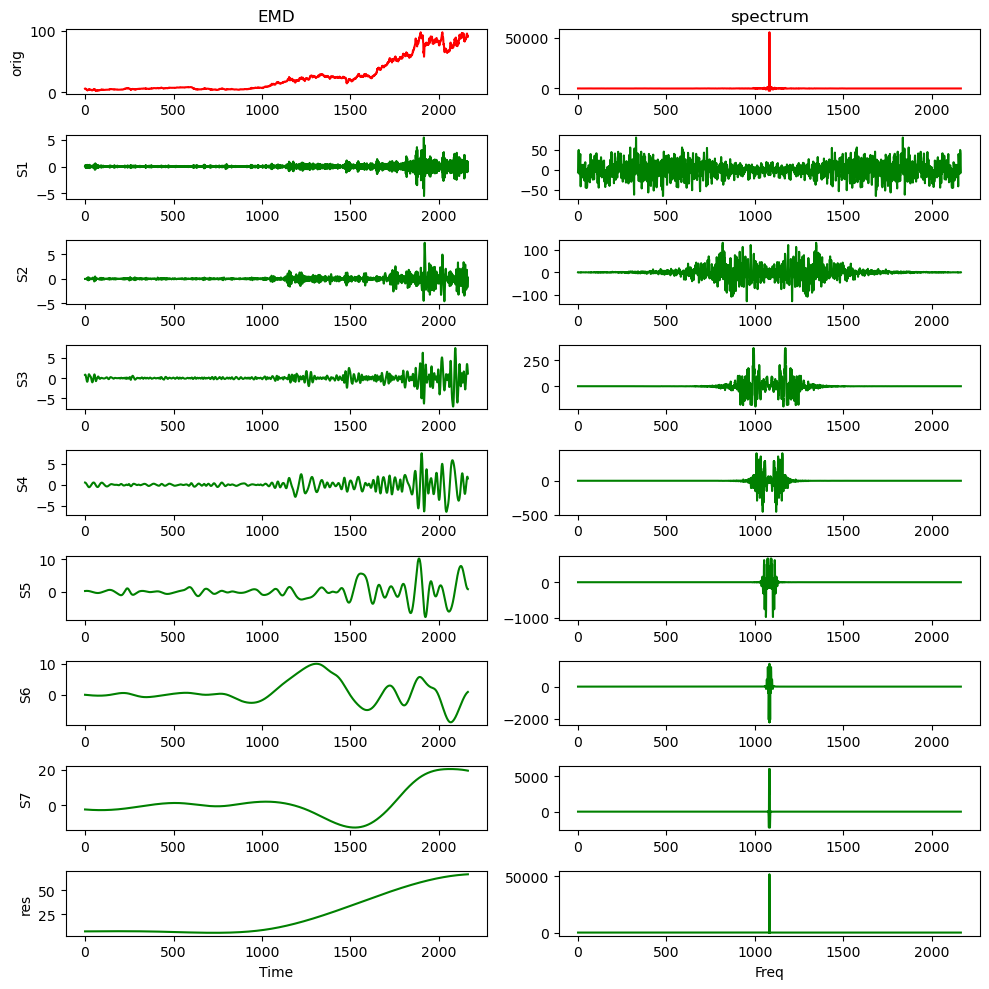

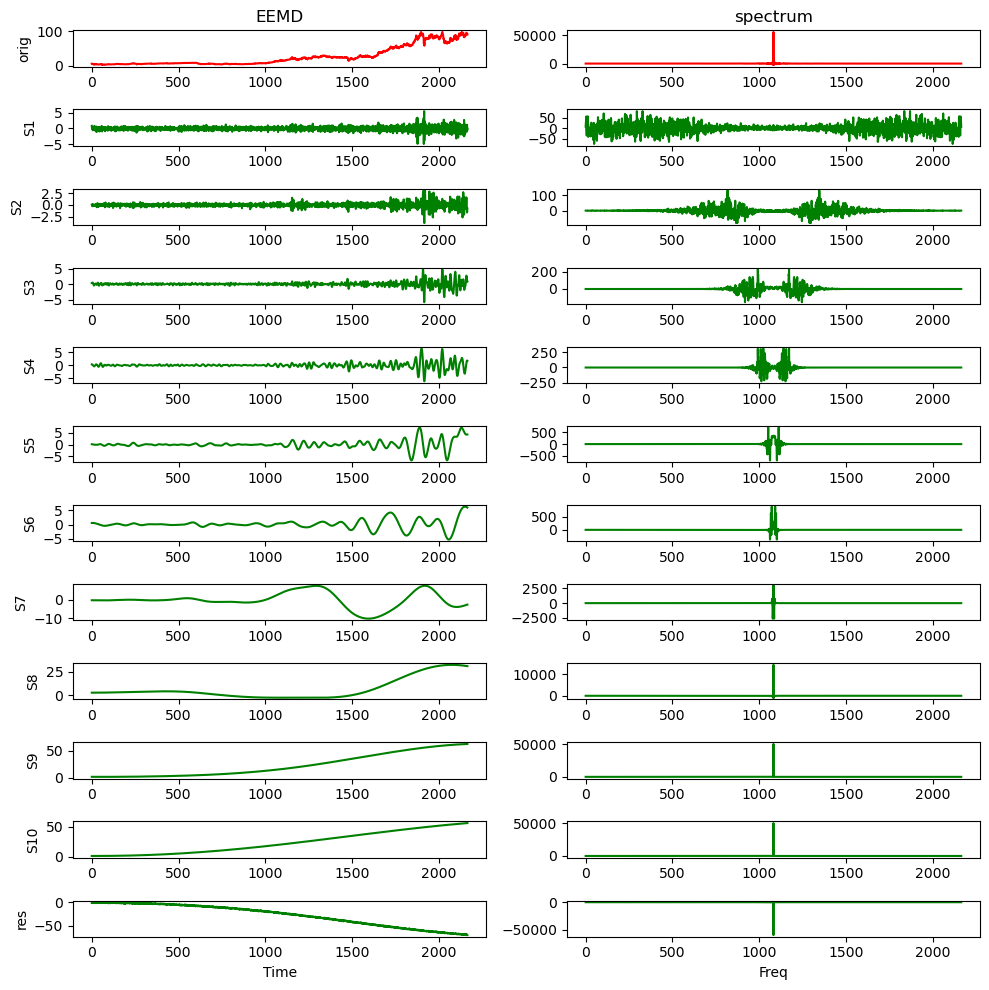

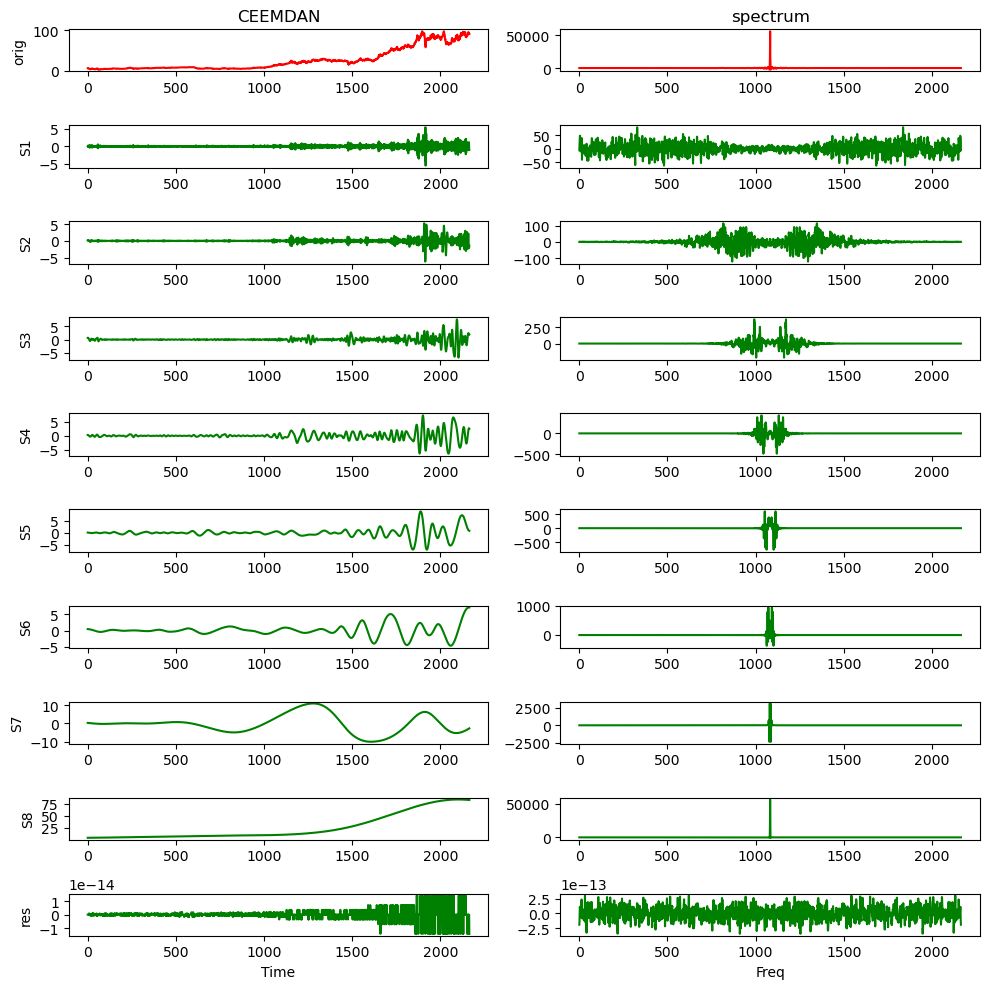

In [5]:
plot_sigs_and_spec('EMD', imfs_emd, y, res_emd)
plot_sigs_and_spec('EEMD', imfs_eemd, y, res_eemd)
plot_sigs_and_spec('CEEMDAN', imfs_ceemdan, y, res_ceemdan)

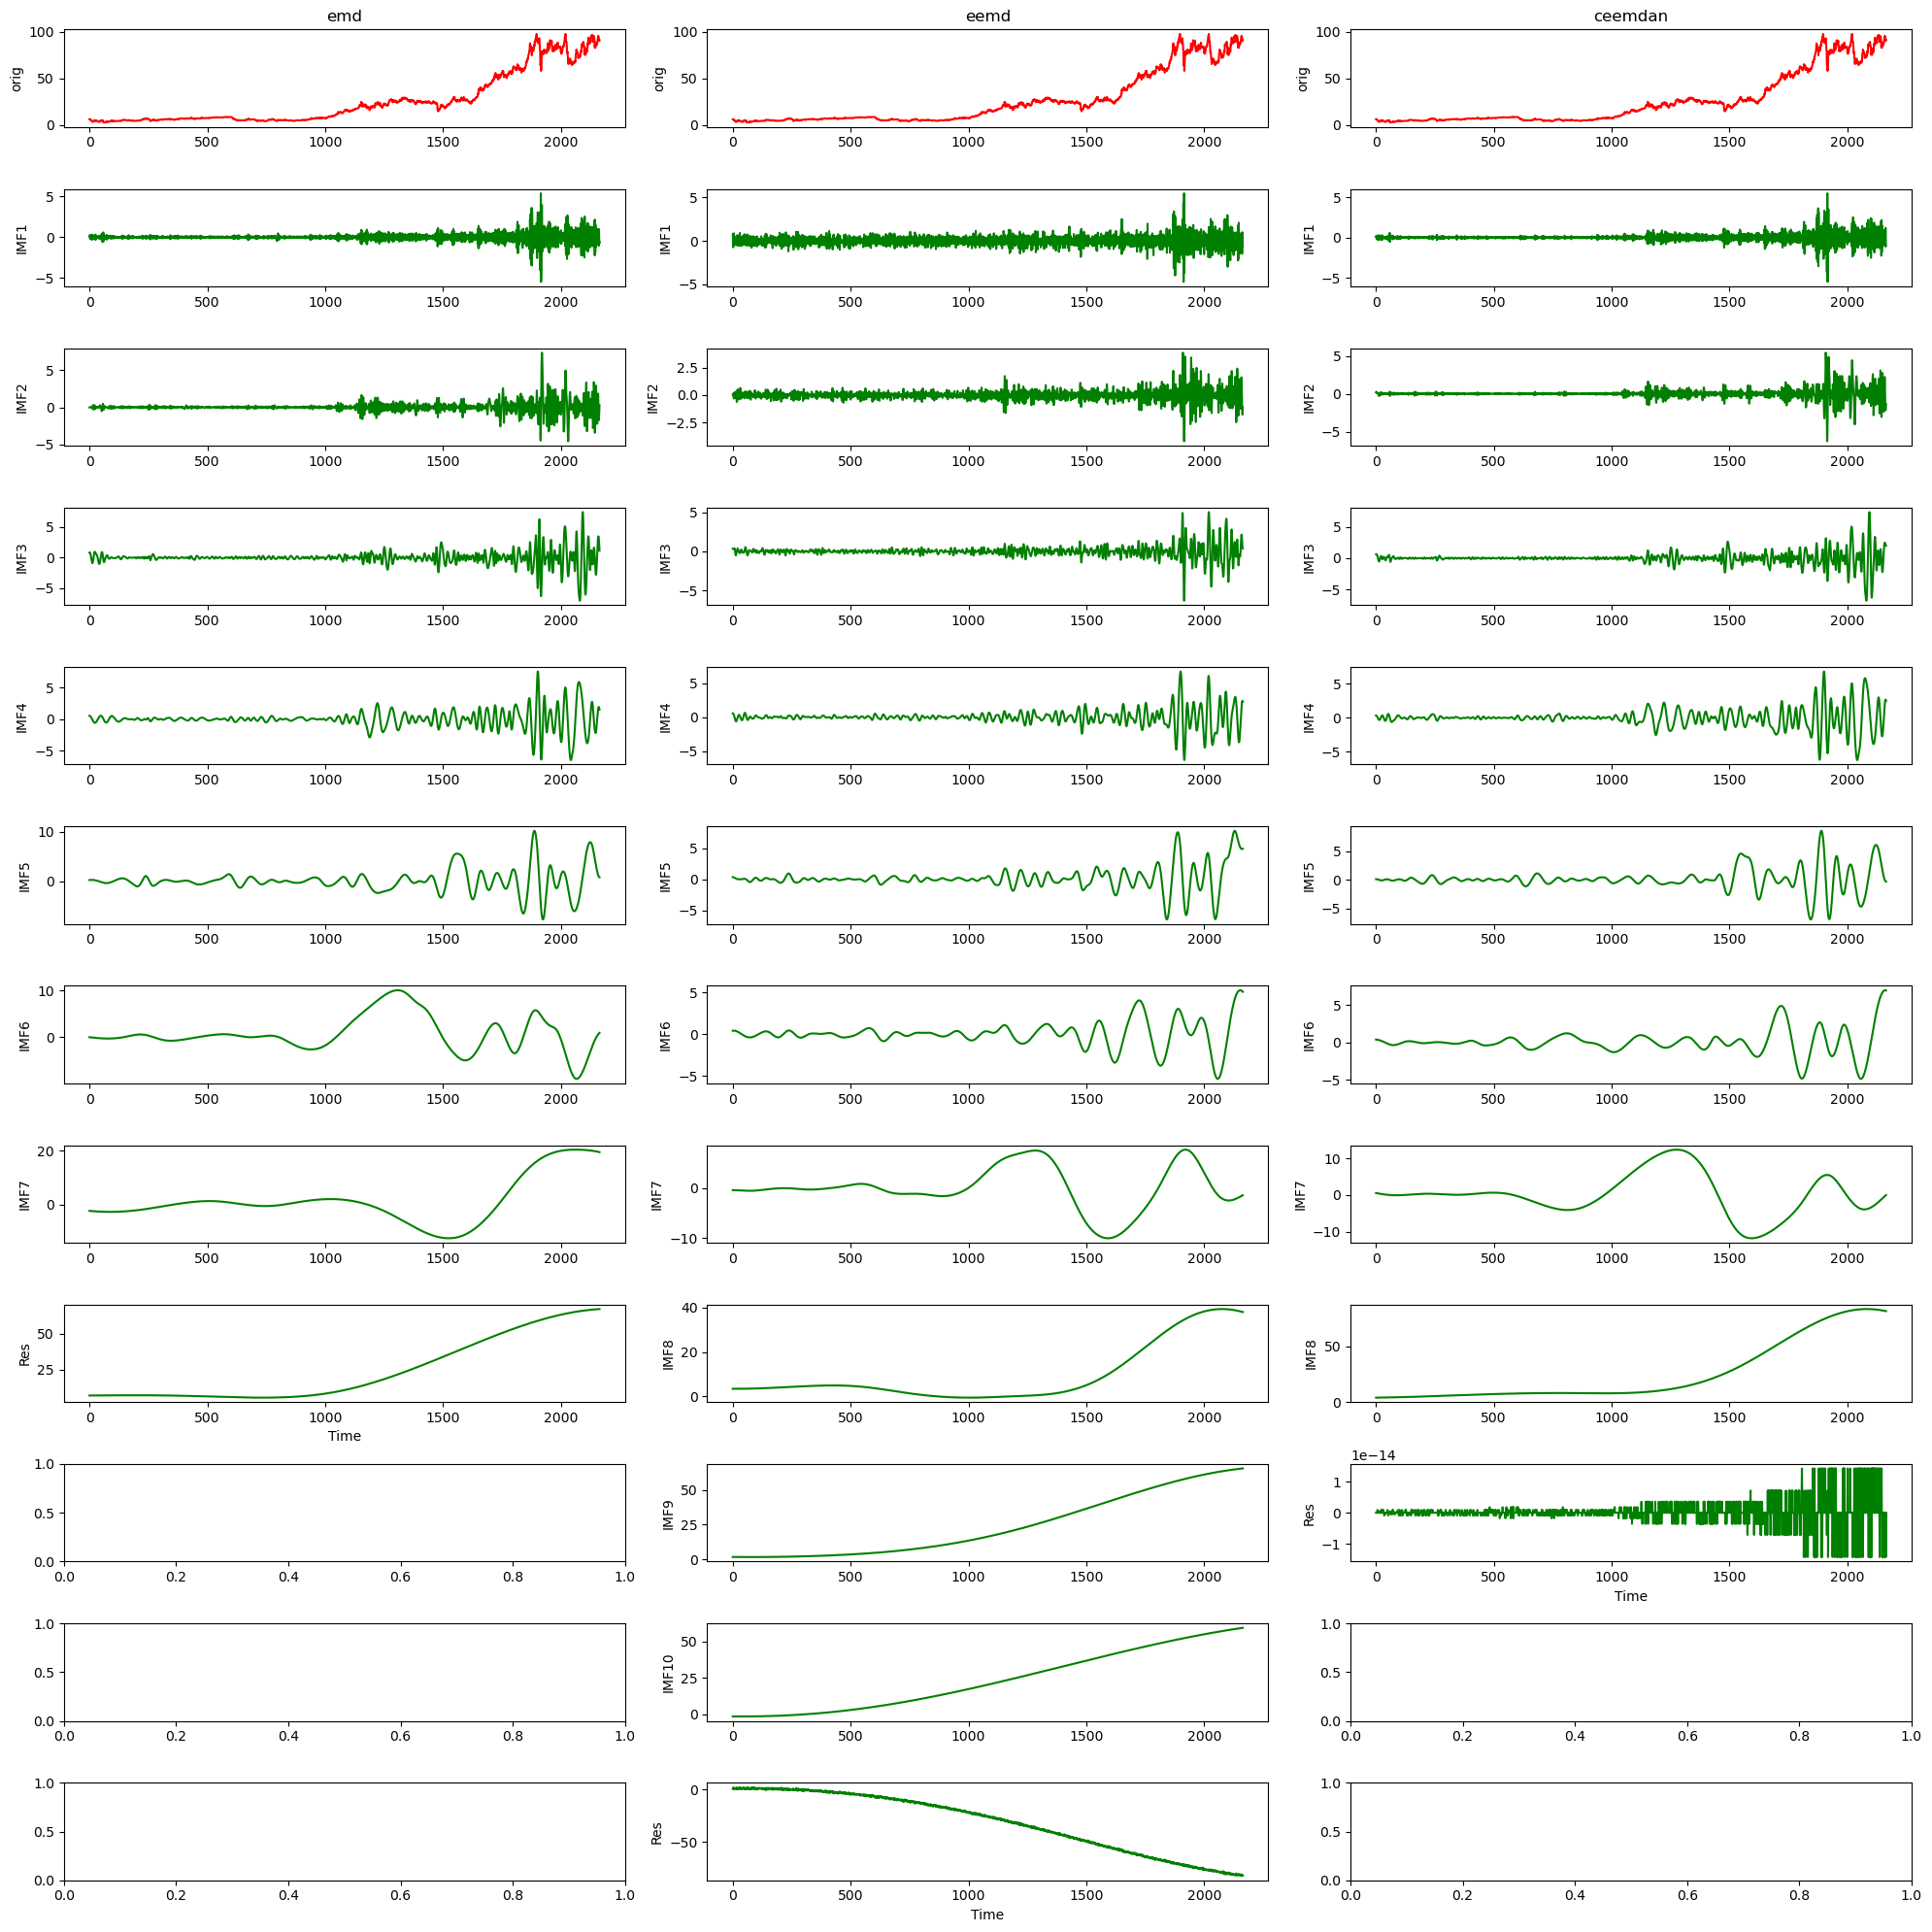

In [7]:
cols = ['emd', 'eemd', 'ceemdan']
ncol = len(cols)
imfs = [imfs_emd, imfs_eemd, imfs_ceemdan]
ress = [res_emd, res_eemd, res_ceemdan]
nrow = max(imfs_emd.shape[0], imfs_eemd.shape[0], imfs_ceemdan.shape[0]) + 2 # orig + imfs + res

fig, axes = plt.subplots(nrow, ncol, figsize=(20,20))

for c in range(len(cols)):
    # orig series
    ax = axes[0][c]
    ax.set_title(cols[c])
    ax.plot(t, y, 'r')
    ax.set_ylabel('orig')
    # imfs
    for n, imf in enumerate(imfs[c]):
        ax = axes[n+1][c]
        ax.plot(t, imf, 'g')
        ax.set_ylabel('IMF'+str(n+1))
    # residue
    ax = axes[n+2][c]
    ax.plot(t, ress[c], 'g')
    ax.set_ylabel('Res')
    ax.set_xlabel("Time")

plt.tight_layout()
plt.show()

In [8]:
def _calc_inst_phase(sig, alpha):
    """Extract analytical signal through the Hilbert Transform."""
    analytic_signal = hilbert(sig)  # Apply Hilbert transform to each row
    if alpha is not None:
        assert -0.5 < alpha < 0.5, "`alpha` must be in between -0.5 and 0.5"
        real_part = np.array([filt6(row.real, alpha) for row in analytic_signal])
        imag_part = np.array([filt6(row.imag, alpha) for row in analytic_signal])
        analytic_signal = real_part + 1j * imag_part
    phase = np.unwrap(np.angle(analytic_signal))  # Compute angle between img and real
    if alpha is not None:
        phase = np.array([filt6(row, alpha) for row in phase])  # Filter phase
    return phase

def _calc_inst_freq(sig, t, order=False, alpha=None):
    """Extracts instantaneous frequency through the Hilbert Transform."""
    inst_phase = _calc_inst_phase(sig, alpha=alpha)
    if order is False:
        inst_freqs = np.diff(inst_phase) / (2 * np.pi * (t[1] - t[0]))
        inst_freqs = np.concatenate((inst_freqs, inst_freqs[:, -1].reshape(inst_freqs[:, -1].shape[0], 1)), axis=1)
    else:
        inst_freqs = [pade6(row, t[1] - t[0]) / (2.0 * np.pi) for row in inst_phase]
    if alpha is None:
        return np.array(inst_freqs)
    else:
        return np.array([filt6(row, alpha) for row in inst_freqs])  # Filter freqs

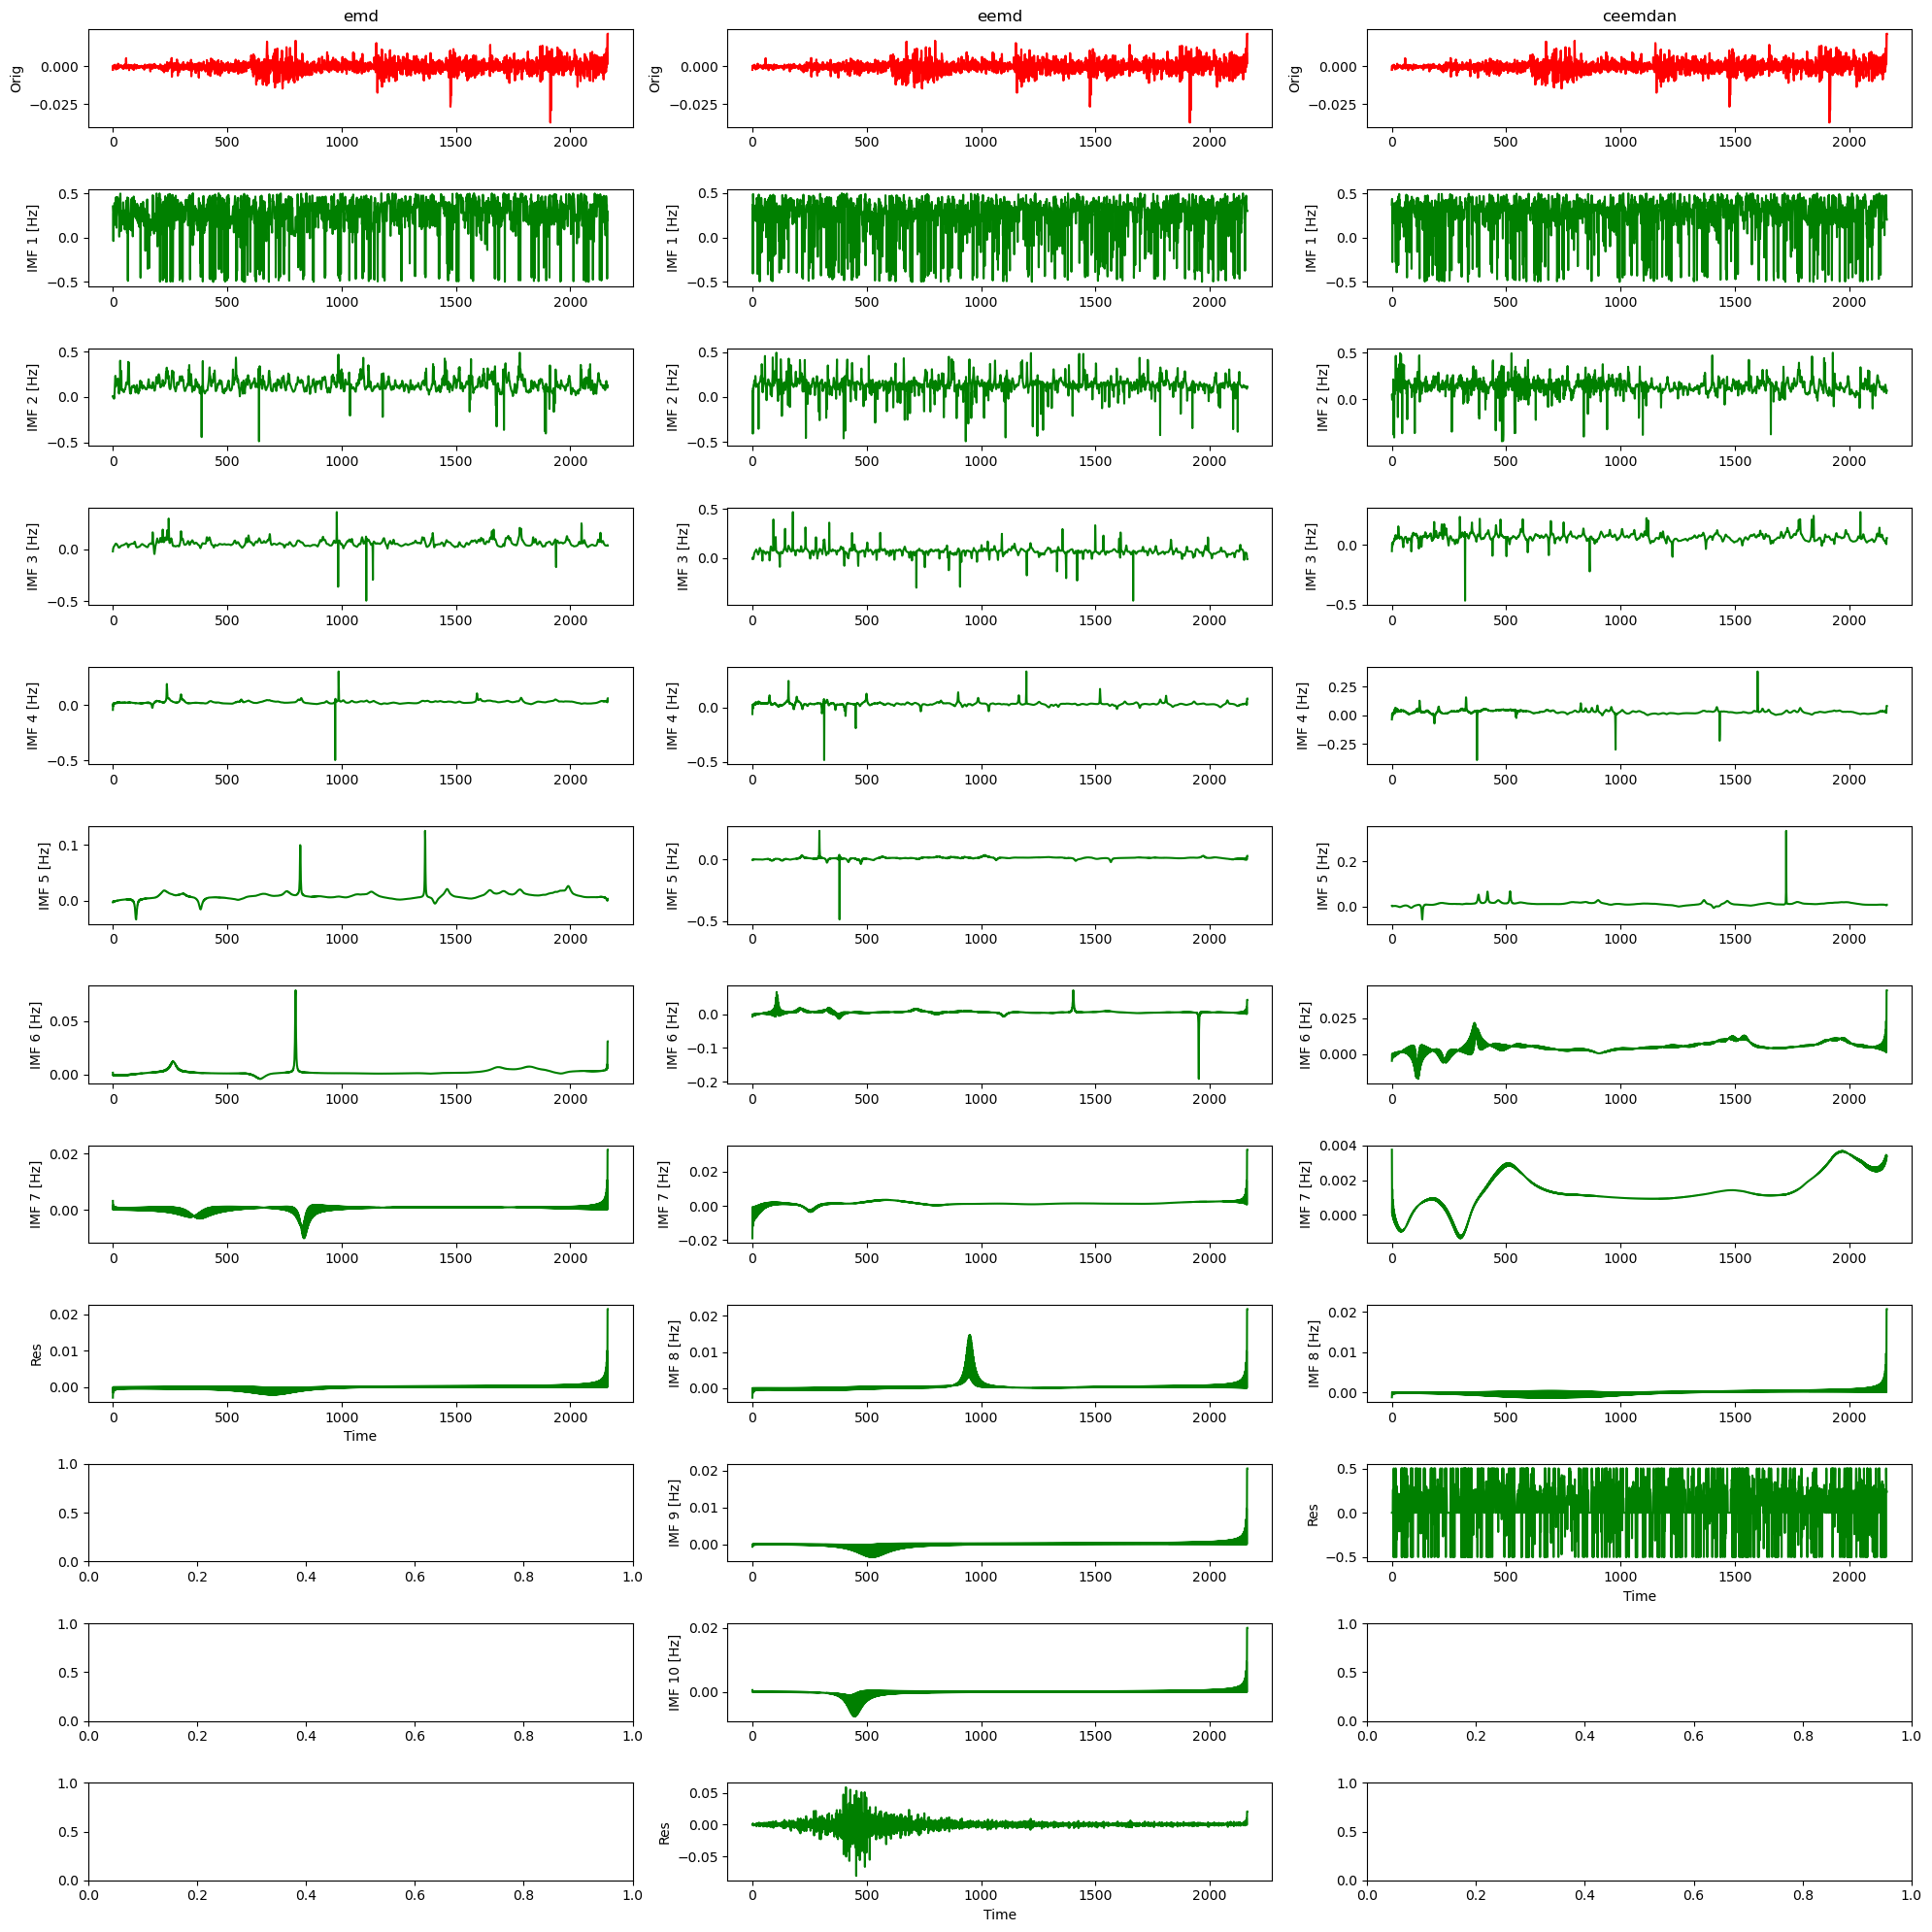

In [9]:
freq_emd = _calc_inst_freq( np.concatenate((np.array([y]), imfs_emd, np.array([res_emd])),axis=0) , t)
freq_eemd = _calc_inst_freq( np.concatenate((np.array([y]), imfs_eemd, np.array([res_eemd])),axis=0) , t)
freq_ceemdan = _calc_inst_freq( np.concatenate((np.array([y]), imfs_ceemdan, np.array([res_ceemdan])),axis=0) , t)
freqs = [freq_emd, freq_eemd, freq_ceemdan]

fig, axes = plt.subplots(nrow, ncol, figsize=(20,20))

for c in range(len(cols)):
    # orig freq
    ax = axes[0][c]
    ax.set_title(cols[c])
    ax.plot(t, freqs[c][0], 'r')
    ax.set_ylabel('orig')
    # imf freq
    for n, imf in enumerate(freqs[c]):
        ax = axes[n][c]
        if n==0:
            # orig
            ax.set_title(cols[c])
            ax.plot(t, imf, 'r')
            ax.set_ylabel('Orig')
        elif n == len(freqs[c])-1:
            # residue
            ax.plot(t, imf, 'g')
            ax.set_ylabel('Res')
            ax.set_xlabel("Time")
        else:
            # imfs
            ax.plot(t, imf, 'g')
            ax.set_ylabel('IMF {} [Hz]'.format(n))

plt.tight_layout()
plt.show()



# VMD

Variational Mode Decomposition

`pip install vmdpy`

[source](https://github.com/vrcarva/vmdpy)

[matlab toolbox](https://www.mathworks.com/matlabcentral/fileexchange/44765-variational-mode-decomposition)

> K. Dragomiretskiy and D. Zosso, "Variational Mode Decomposition," in IEEE Transactions on Signal Processing, vol. 62, no. 3, pp. 531-544, Feb.1, 2014, doi: 10.1109/TSP.2013.2288675.


(20, 2165)
(2165,)
0.18343688838633682


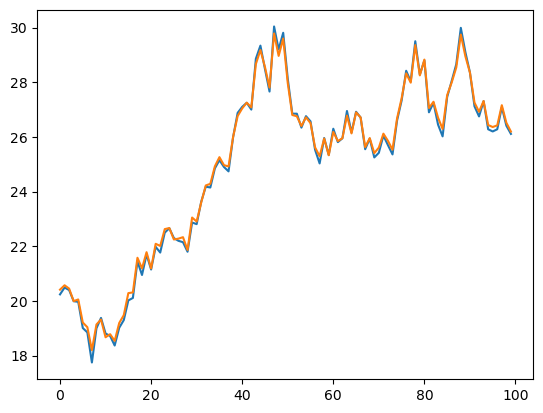

In [8]:
def decomp_vmd(series, n_decomp=6):
    from vmdpy import VMD
    # in VMD(), the last sample is discarded if the series has odd length, 
    # so pad a zero at the beginning, and remove it after decomposition
    series_len = len(series)
    if series_len%2:
        series = np.concatenate((np.zeros(1), series))
    u, u_hat, omega = VMD(  
        series, 
        alpha=len(series)*1.5,  # moderate bandwidth constraint, 带宽限制 经验取值为 抽样点长度 1.5-2.0 倍
        tau=0,      # noise-tolerance (no strict fidelity enforcement)
        K=n_decomp, # number of modes
        DC=True,    # has DC component
        init=1,     # initialize omegas uniformly
        tol=1e-6    # tolerance
    )
    if series_len%2:
        u = u[:,1:]
    return u


y = np.array(df['C_Price'])
u = decomp_vmd(y, n_decomp=20)
print(u.shape)
print(y.shape)
u_sum = np.sum(u, axis=0)
print(cal_rmse(u_sum, y))

plt.plot(y[1500:1600])
plt.plot(u_sum[1500:1600])

c:\Anaconda3\envs\torch37\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


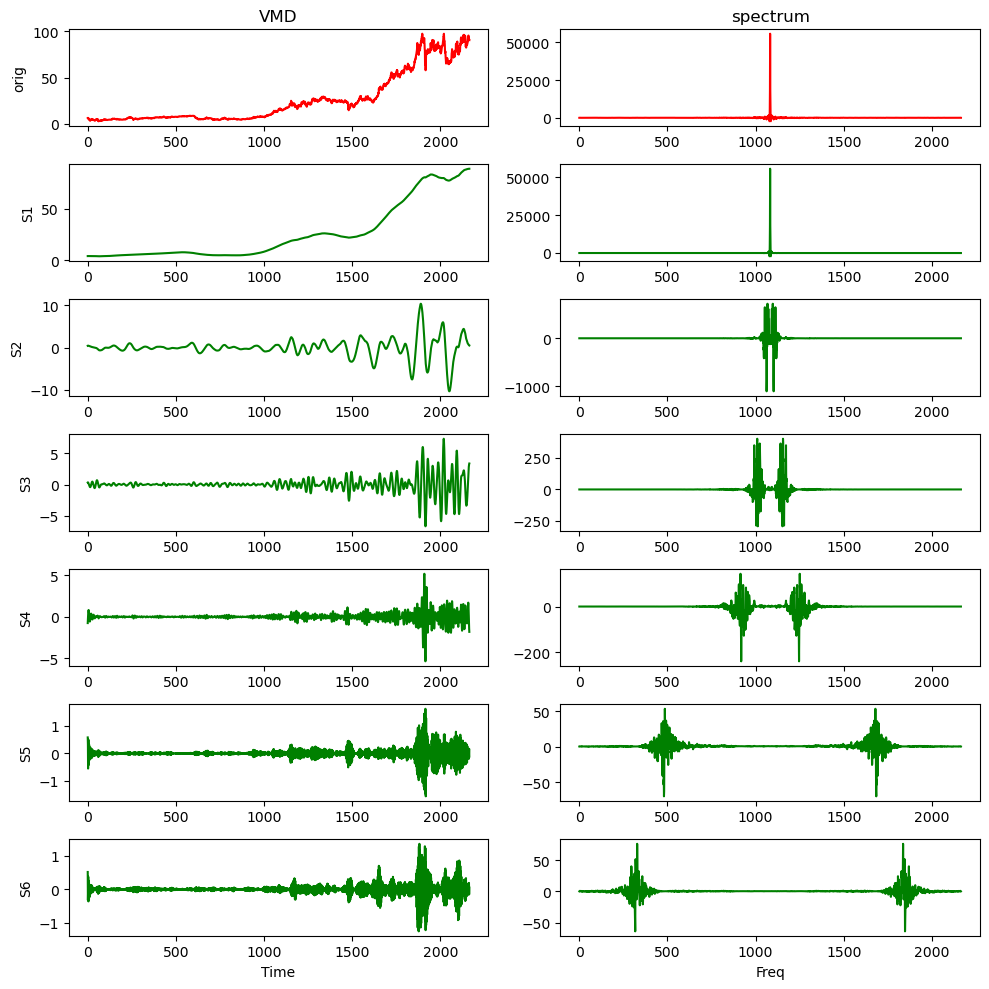

In [6]:
plot_sigs_and_spec('VMD', u, y)

# LMD

Local Mean Decomposition

`pip install PyLMD` 

[pypi](https://pypi.org/project/PyLMD/)

> Jonathan S. Smith. The local mean decomposition and its application to EEG perception data. Journal of the Royal Society Interface, 2005, 2(5):443-454

In [12]:
from PyLMD import LMD
lmd = LMD()
PFs_lmd, res_lmd = lmd.lmd(y)

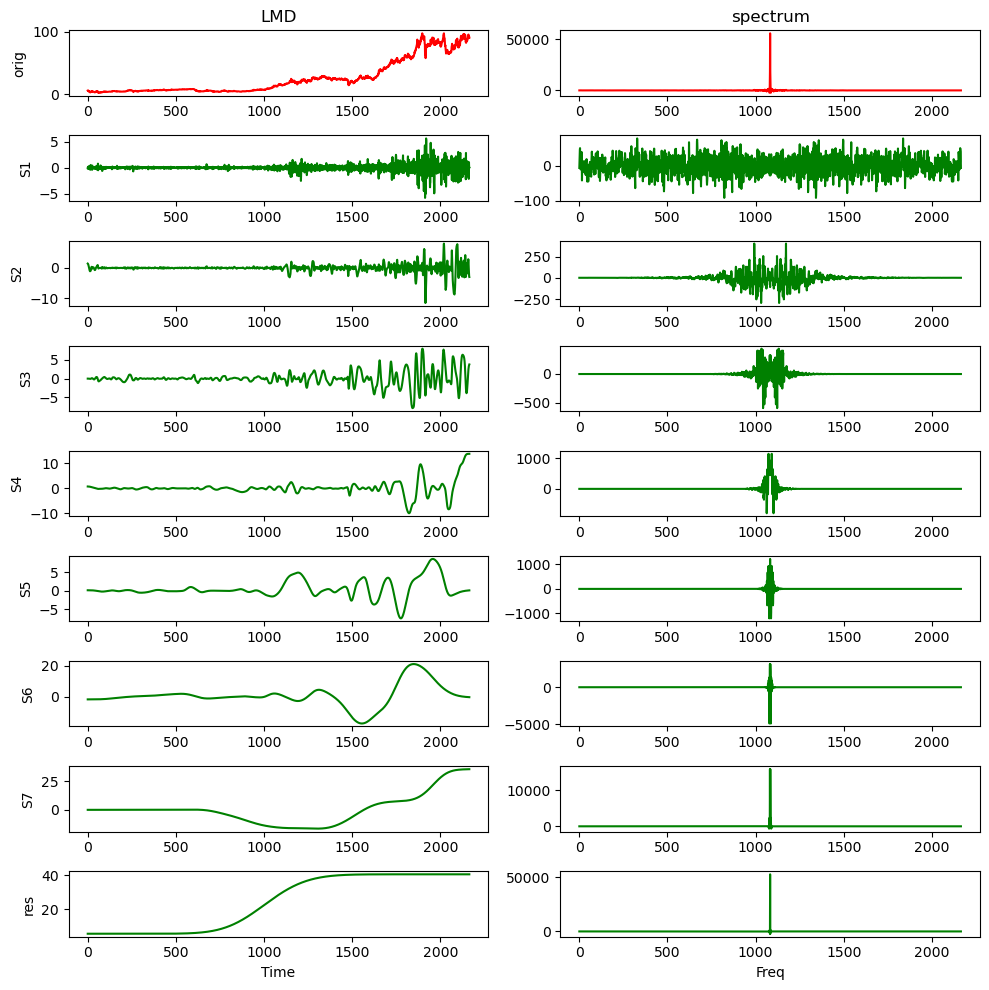

In [13]:
plot_sigs_and_spec('LMD', PFs_lmd, y, res_lmd)

# EWT

Empirical Wavelet Transform

`pip install ewtpy` 

[source](https://github.com/vrcarva/ewtpy)

[matlab toolbox](https://www.mathworks.com/matlabcentral/fileexchange/42141-empirical-wavelet-transforms)

> J. Gilles, "Empirical Wavelet Transform," in IEEE Transactions on Signal Processing, vol. 61, no. 16, pp. 3999-4010, Aug.15, 2013, doi: 10.1109/TSP.2013.2265222.


In [14]:
import ewtpy
ewt, mfb, boundaries = ewtpy.EWT1D(y, N = 6)

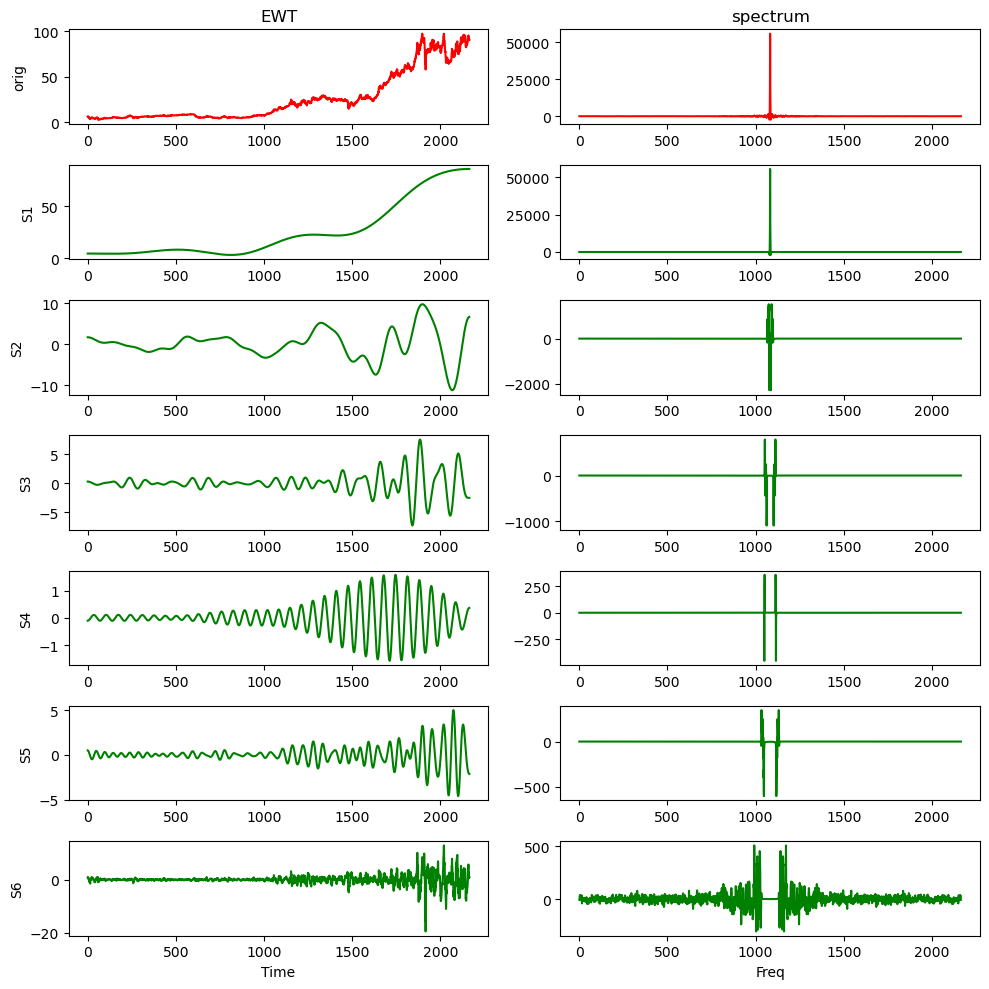

In [15]:
plot_sigs_and_spec('EWT', ewt.T, y)

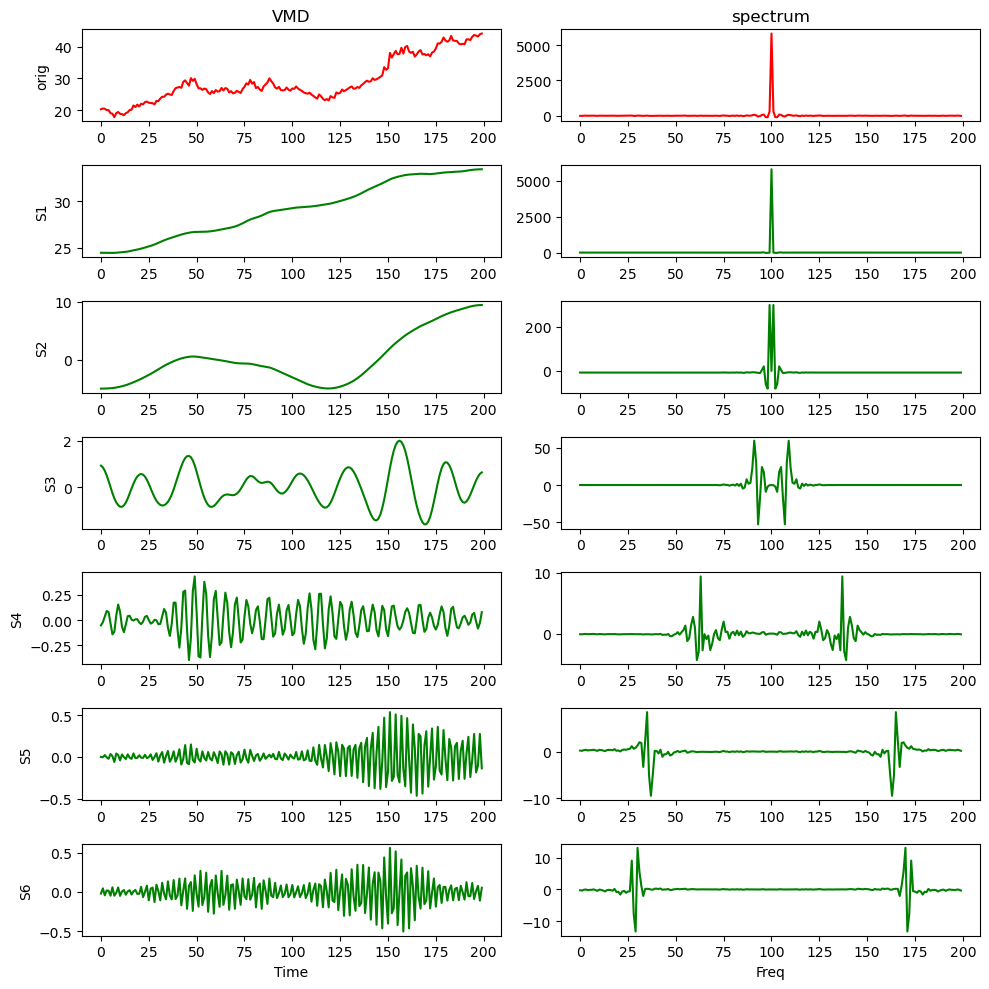

In [23]:
# 重复不了啦啊啊啊啊！
u, u_hat, omega = VMD(series, alpha, tau, num_mode, dc_comp, init, tol)
plot_sigs_and_spec('VMD', u, series)

# SSA

Singular Spectrum Analysis

[a really nice notebook](https://www.kaggle.com/code/jdarcy/introducing-ssa-for-time-series-decomposition)


### direct ssa

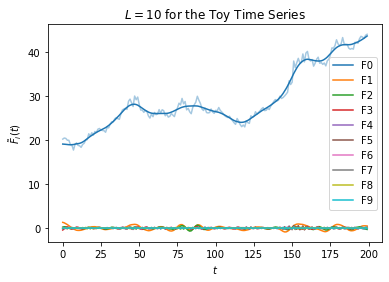

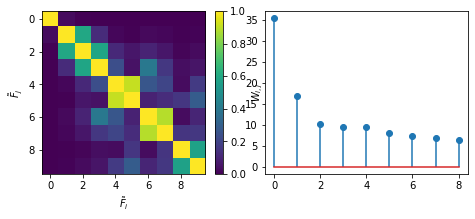

In [24]:
from ssa import SSA

# decompose with ssa
n_decomp = 10
n_integr = 6
series = y[1500:1700]

ssa = SSA(series, n_decomp)
# ssa.denoising()

ssa.components_to_df().plot()
ssa.orig_TS.plot(alpha=0.4)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title(r"$L={}$ for the Toy Time Series".format(n_decomp))
plt.show()

plt.figure(figsize=(8,3))
plt.subplot(121)
ssa.plot_wcorr()
plt.subplot(122)
plt.stem(ssa.Sigma[1:])
plt.show()

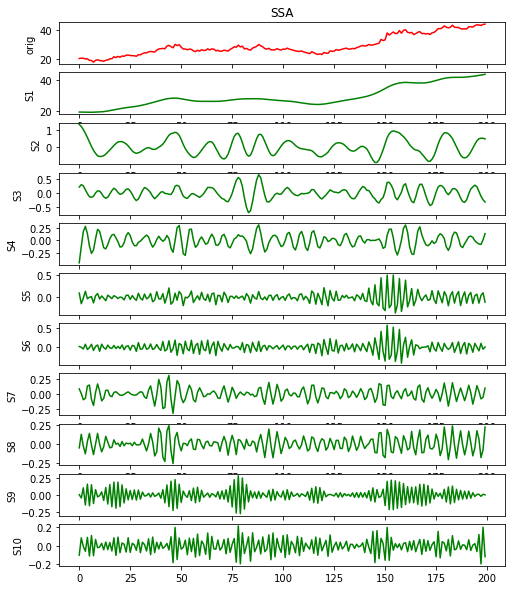

In [18]:
imfs = ssa.components_to_df()
ncomp = imfs.shape[1]
fig, axes = plt.subplots(ncomp+1, 1, figsize=(8,10))
# orig
ax = axes[0]
ax.set_title('SSA')
ax.plot(ssa.orig_TS, 'r')
ax.set_ylabel('orig')
# decomposed
for i in range(ncomp):
    ax = axes[i+1]
    ax.plot(imfs.iloc[:,i], 'g')
    ax.set_ylabel('S%d' %(i+1))

<StemContainer object of 3 artists>

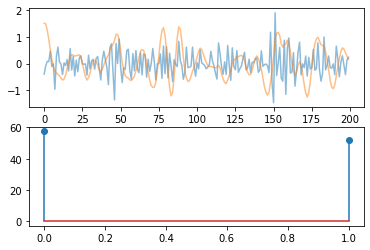

In [28]:
# group with AgglomerativeClustering based on wcorr
n_integr = 3
from sklearn.cluster import AgglomerativeClustering
distance_matrix = 1 / ssa.Wcorr
cls = AgglomerativeClustering(n_clusters=n_integr, linkage='average', affinity='precomputed')
cls = cls.fit(distance_matrix)
reconstr = np.zeros((n_integr, len(series)))
new_sigma = np.zeros(n_integr)
for i in range(n_integr):
    reconstr[i,:] = ssa.reconstruct(np.where(cls.labels_==i)[0])
    new_sigma[i] = np.sum(ssa.Sigma[np.where(cls.labels_==i)[0]])

# sort by new sigma
sortIdx = new_sigma.argsort()[::-1] # higher sigma (signal instead of noise) comes first
reconstr = reconstr[sortIdx]
new_sigma = new_sigma[sortIdx]


plt.figure()
plt.subplot(211)
for i in range(1,len(reconstr)):
    plt.plot(reconstr[i], alpha=0.5)
plt.subplot(212)
plt.stem(new_sigma[1:])

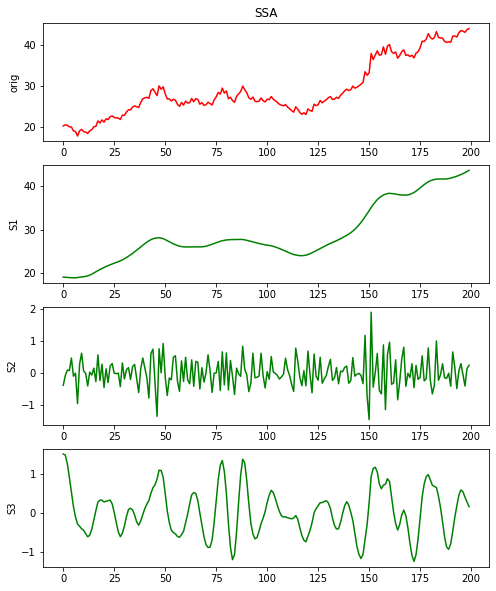

In [29]:
ncomp = reconstr.shape[0]
fig, axes = plt.subplots(ncomp+1, 1, figsize=(8,10))
# orig
ax = axes[0]
ax.set_title('SSA')
ax.plot(ssa.orig_TS, 'r')
ax.set_ylabel('orig')
# decomposed
for i in range(ncomp):
    ax = axes[i+1]
    ax.plot(reconstr[i], 'g')
    ax.set_ylabel('S%d' %(i+1))

In [77]:
from models import *
from utils import *

pred = np.zeros(reconstr.shape) # (3,200)
real = np.zeros(reconstr.shape)

epoch 001 train_loss 0.00614751 val_loss 0.00210715
epoch 002 train_loss 0.00191414 val_loss 0.00191757
epoch 003 train_loss 0.00330297 val_loss 0.00219013
EarlyStopping counter: 1 out of 7
epoch 004 train_loss 0.00317995 val_loss 0.00301079
EarlyStopping counter: 2 out of 7
epoch 005 train_loss 0.00448644 val_loss 0.00170430
epoch 006 train_loss 0.00353967 val_loss 0.00228219
EarlyStopping counter: 1 out of 7
epoch 007 train_loss 0.00350338 val_loss 0.00199004
EarlyStopping counter: 2 out of 7
epoch 008 train_loss 0.00280100 val_loss 0.00195351
EarlyStopping counter: 3 out of 7
epoch 009 train_loss 0.00310635 val_loss 0.00424685
EarlyStopping counter: 4 out of 7
epoch 010 train_loss 0.00319971 val_loss 0.00266598
EarlyStopping counter: 5 out of 7
epoch 011 train_loss 0.00276061 val_loss 0.00265384
EarlyStopping counter: 6 out of 7
epoch 012 train_loss 0.00316600 val_loss 0.00274814
EarlyStopping counter: 7 out of 7
Early stopping
performance of ssa-0-tcn
col 0: RMSE=0.35, MAPE=0.86%


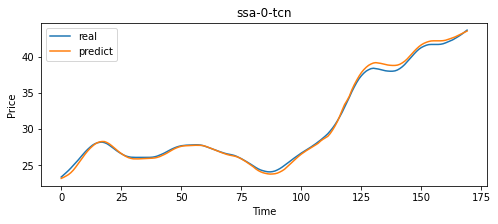

In [79]:
# 0

model_name = 'ssa-0-tcn'
m = TCN_model(model_name, 1)
subseries = reconstr[0].reshape(-1,1)

_ = m.predict(subseries, subseries, seq_len=30, pred_len=1)
pred0, real0 = m.apply_model(False)

plt.figure(figsize=(8,3))
plt.plot(real0, label="real")
plt.plot(pred0, label="predict")
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend(loc='best')
plt.title(model_name) # +', rmse = %.2f, mape = %.2f%%' %(cal_rmse(real,pred), cal_mape(real,pred))
plt.show()

epoch 001 train_loss 0.06998255 val_loss 0.07498289
epoch 002 train_loss 0.06292923 val_loss 0.05537273
epoch 003 train_loss 0.06752944 val_loss 0.04762602
epoch 004 train_loss 0.06338276 val_loss 0.03819148
epoch 005 train_loss 0.07058735 val_loss 0.04456025
EarlyStopping counter: 1 out of 7
epoch 006 train_loss 0.06067059 val_loss 0.06643154
EarlyStopping counter: 2 out of 7
epoch 007 train_loss 0.07312451 val_loss 0.09442532
EarlyStopping counter: 3 out of 7
epoch 008 train_loss 0.04991892 val_loss 0.04919127
EarlyStopping counter: 4 out of 7
epoch 009 train_loss 0.05529510 val_loss 0.08170411
EarlyStopping counter: 5 out of 7
epoch 010 train_loss 0.07958442 val_loss 0.04205377
EarlyStopping counter: 6 out of 7
epoch 011 train_loss 0.06529206 val_loss 0.04396773
EarlyStopping counter: 7 out of 7
Early stopping
performance of ssa-2-tcn
col 0: RMSE=0.11, MAPE=56.05%


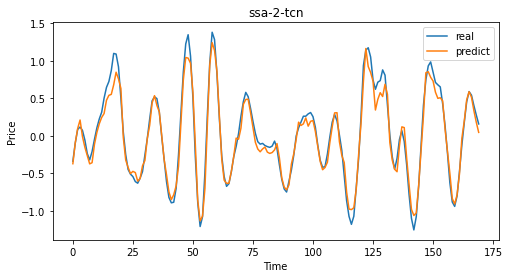

In [83]:
model_name = 'ssa-2-tcn'
m = TCN_model(model_name, 1)
subseries = reconstr[2].reshape(-1,1)

_ = m.predict(subseries, subseries, seq_len=30, pred_len=1)
pred2, real2 = m.apply_model(False)

plt.figure(figsize=(8,4))
plt.plot(real2, label="real")
plt.plot(pred2, label="predict")
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend(loc='best')
plt.title(model_name) # +', rmse = %.2f, mape = %.2f%%' %(cal_rmse(real,pred), cal_mape(real,pred))
plt.show()


p = 0,q = 
0 1 2 3 4 
min aic for now: 57.483641, corresponding (p,q): (0,4)
min bic for now: 70.679696, corresponding (p,q): (0,3)

p = 1,q = 
0 1 2 3 4 
min aic for now: 56.458029, corresponding (p,q): (1,4)
min bic for now: 70.679696, corresponding (p,q): (0,3)

p = 2,q = 
0 1 2 3 4 
min aic for now: 43.616301, corresponding (p,q): (2,2)
min bic for now: 60.107887, corresponding (p,q): (2,2)

p = 3,q = 
0 1 2 3 4 
min aic for now: 43.616301, corresponding (p,q): (2,2)
min bic for now: 60.107887, corresponding (p,q): (2,2)

p = 4,q = 
0 1 2 3 4 
min aic for now: 26.979763, corresponding (p,q): (4,3)
min bic for now: 53.366301, corresponding (p,q): (4,3)
min aic: 56.000000, corresponding (p,q): (1,4)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(1, 0, 4)   Log Likelihood                 -22.229
Date:                Sun, 30 Jul 2023   AIC        

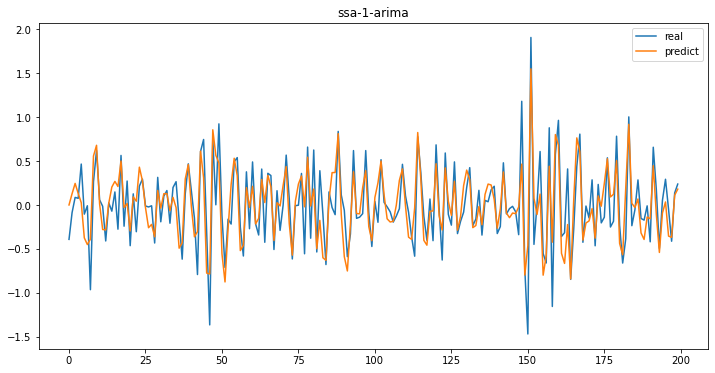

In [96]:
from sarimax import *

endog = reconstr[1].reshape(-1,1)
exog = None

### manually fit the model
d = 0
orders = (d,range(5),range(5))
aic_mat, bic_mat = sweepSARIMAX(endog, orders, exog=exog)
p,q = bestSARIMAX(aic_mat, bic_mat, cri='aic')
model = sm.tsa.statespace.SARIMAX(endog, exog, order=(p,d,q)).fit(disp=False)
print(model.summary())

real1 = endog
pred1 = model.get_prediction().predicted_mean

# visualize
fig, ax = plt.subplots(figsize=(12,6))
ax.set(title='ssa-1-arima')
ax.plot(real1, label='real')
ax.plot(pred1, label='predict')
legend = ax.legend(loc='best')
plt.show()

real1 = real1[:-30].reshape(-1,1)
pred1 = pred1[:-30].reshape(-1,1)


Text(0, 0.5, 'S3')

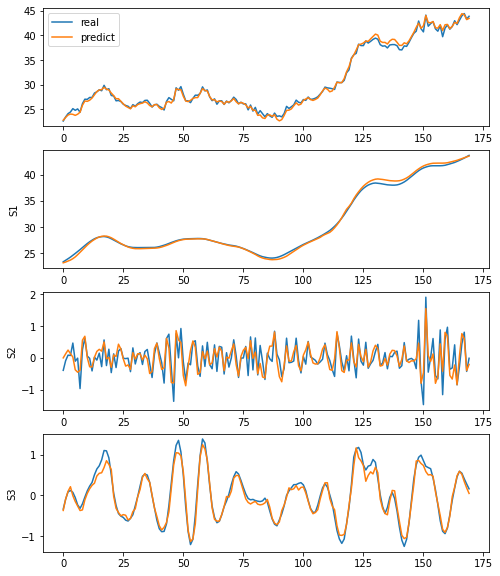

In [98]:
fig, axes = plt.subplots(4, 1, figsize=(8,10))

ax = axes[0]
ax.plot(real0+real1+real2, label='real')
ax.plot(pred0+pred1+pred2, label='predict')
ax.legend()
# ax.set_ylabel()
    
ax = axes[1]
ax.plot(real0)
ax.plot(pred0)
ax.set_ylabel('S1')

ax = axes[2]
ax.plot(real1)
ax.plot(pred1)
ax.set_ylabel('S2')

ax = axes[3]
ax.plot(real2)
ax.plot(pred2)
ax.set_ylabel('S3')

In [14]:
# white noise test
from statsmodels.tsa import stattools
for i in range(len(reconstr)):
    LjungBox = stattools.q_stat(stattools.acf(reconstr[i])[1:11],len(reconstr[i]))
    print(LjungBox[1][0])

1.5515781229003186e-44
3.4312425453843227e-37
1.2226854418881132e-14
0.29384451091536923
1.0545819508706397e-39
1.852280339350621e-15


### denoise before grouping

<StemContainer object of 3 artists>

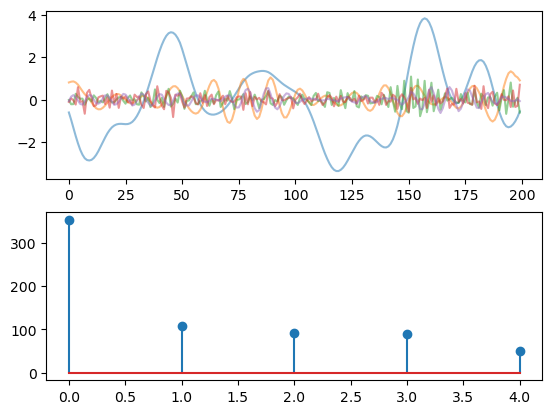

In [21]:
n_decomp = 50
n_integr = 6
series = y[1500:1700]

# decompose with ssa
ssa = SSA(series, n_decomp)

# denoise
tot = np.sum(ssa.Sigma)
acc = 0
for i in range(len(ssa.Sigma)):
    acc += ssa.Sigma[i]
    if acc > 0.98 * tot:
        break
# reco = np.array(ssa.reconstruct(range(i)))
# orig = np.array(ssa.orig_TS)
# print(cal_rmse(orig, reco))
# plt.figure()
# plt.plot(orig, alpha=0.5)
# plt.plot(reco, alpha=0.5)

# group with AgglomerativeClustering based on wcorr
from sklearn.cluster import AgglomerativeClustering
distance_matrix = 1 / ssa.Wcorr
distance_matrix = distance_matrix[0:i,0:i]
cls = AgglomerativeClustering(n_clusters=n_integr, linkage='average', affinity='precomputed')
cls = cls.fit(distance_matrix)
reconstr = np.zeros((n_integr, len(series)))
new_sigma = np.zeros(n_integr)
for i in range(n_integr):
    reconstr[i,:] = ssa.reconstruct(np.where(cls.labels_==i)[0])
    new_sigma[i] = np.sum(ssa.Sigma[np.where(cls.labels_==i)[0]])

# sort by new sigma
sortIdx = new_sigma.argsort()[::-1] # higher sigma (signal instead of noise) comes first
reconstr = reconstr[sortIdx]
new_sigma = new_sigma[sortIdx]


plt.figure()
plt.subplot(211)
for i in range(1,len(reconstr)):
    plt.plot(reconstr[i], alpha=0.5)
plt.subplot(212)
plt.stem(new_sigma[1:])


In [22]:
n_decomp = 50
n_integr = 6
series = y[1500:1700]

# decompose with ssa
ssa = SSA(series, n_decomp)


# group with AgglomerativeClustering based on wcorr
from sklearn.cluster import AgglomerativeClustering
distance_matrix = 1 / ssa.Wcorr

cls = AgglomerativeClustering(n_clusters=n_integr, linkage='average', affinity='precomputed')
cls = cls.fit(distance_matrix)
reconstr11 = np.zeros((n_integr, len(series)))
new_sigma = np.zeros(n_integr)
for i in range(n_integr):
    reconstr11[i,:] = ssa.reconstruct(np.where(cls.labels_==i)[0])
    new_sigma[i] = np.sum(ssa.Sigma[np.where(cls.labels_==i)[0]])

# sort by new sigma
sortIdx = new_sigma.argsort()[::-1] # higher sigma (signal instead of noise) comes first
reconstr11 = reconstr11[sortIdx]
new_sigma = new_sigma[sortIdx]




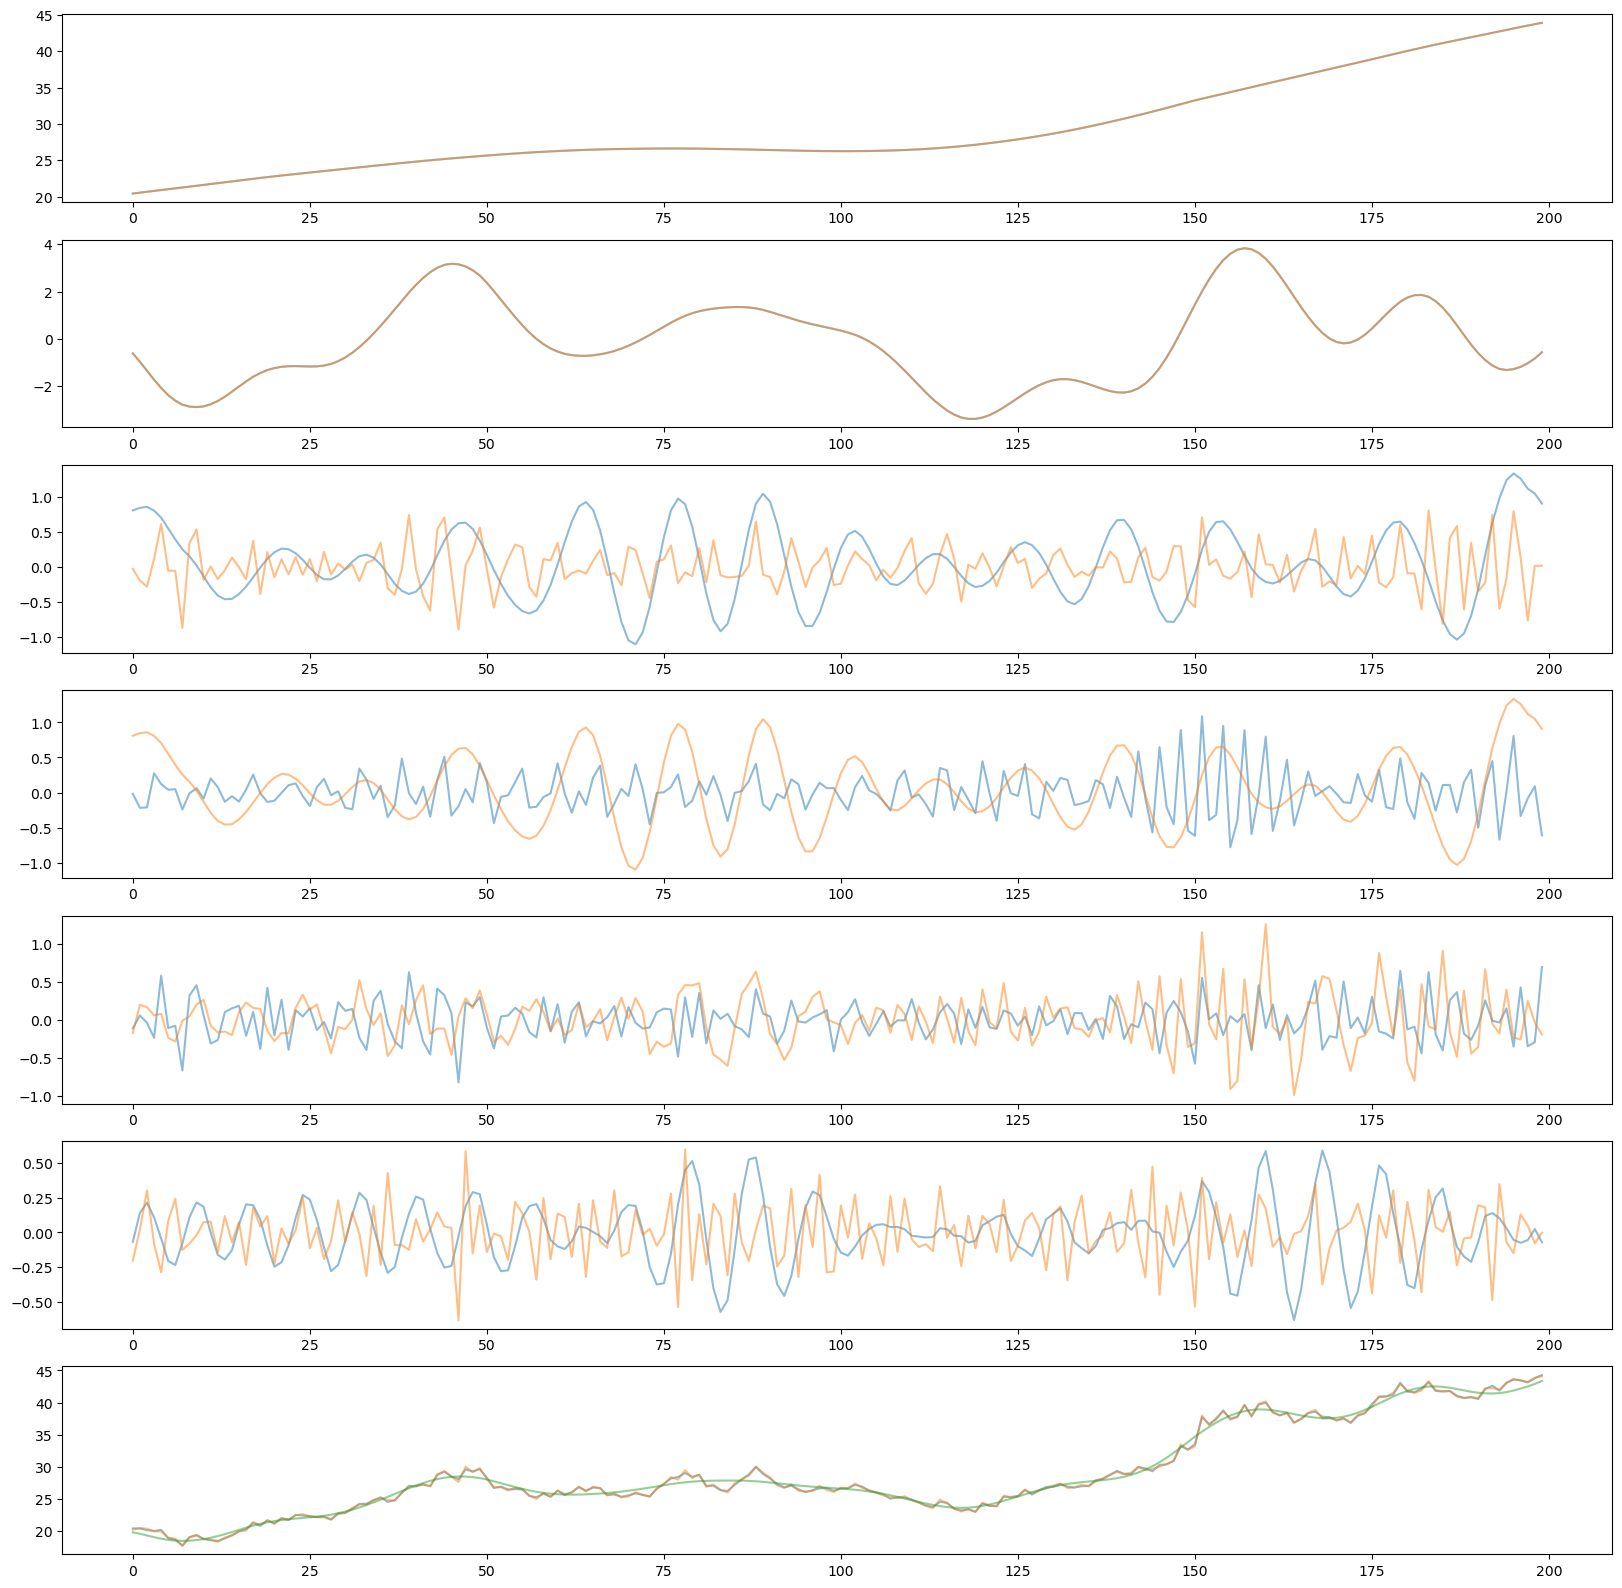

In [25]:
plt.figure(figsize=(20,20))
for i in range(n_integr):
    plt.subplot(n_integr+1, 1, i+1)
    plt.plot(reconstr[i], alpha=0.5)
    plt.plot(reconstr11[i], alpha=0.5)
plt.subplot(n_integr+1,1,i+2)
plt.plot(np.sum(reconstr, axis=0), alpha=0.5)
plt.plot(np.sum(reconstr11, axis=0), alpha=0.5)
plt.plot(reconstr[0]+reconstr[1], alpha=0.5)


### windowing effect

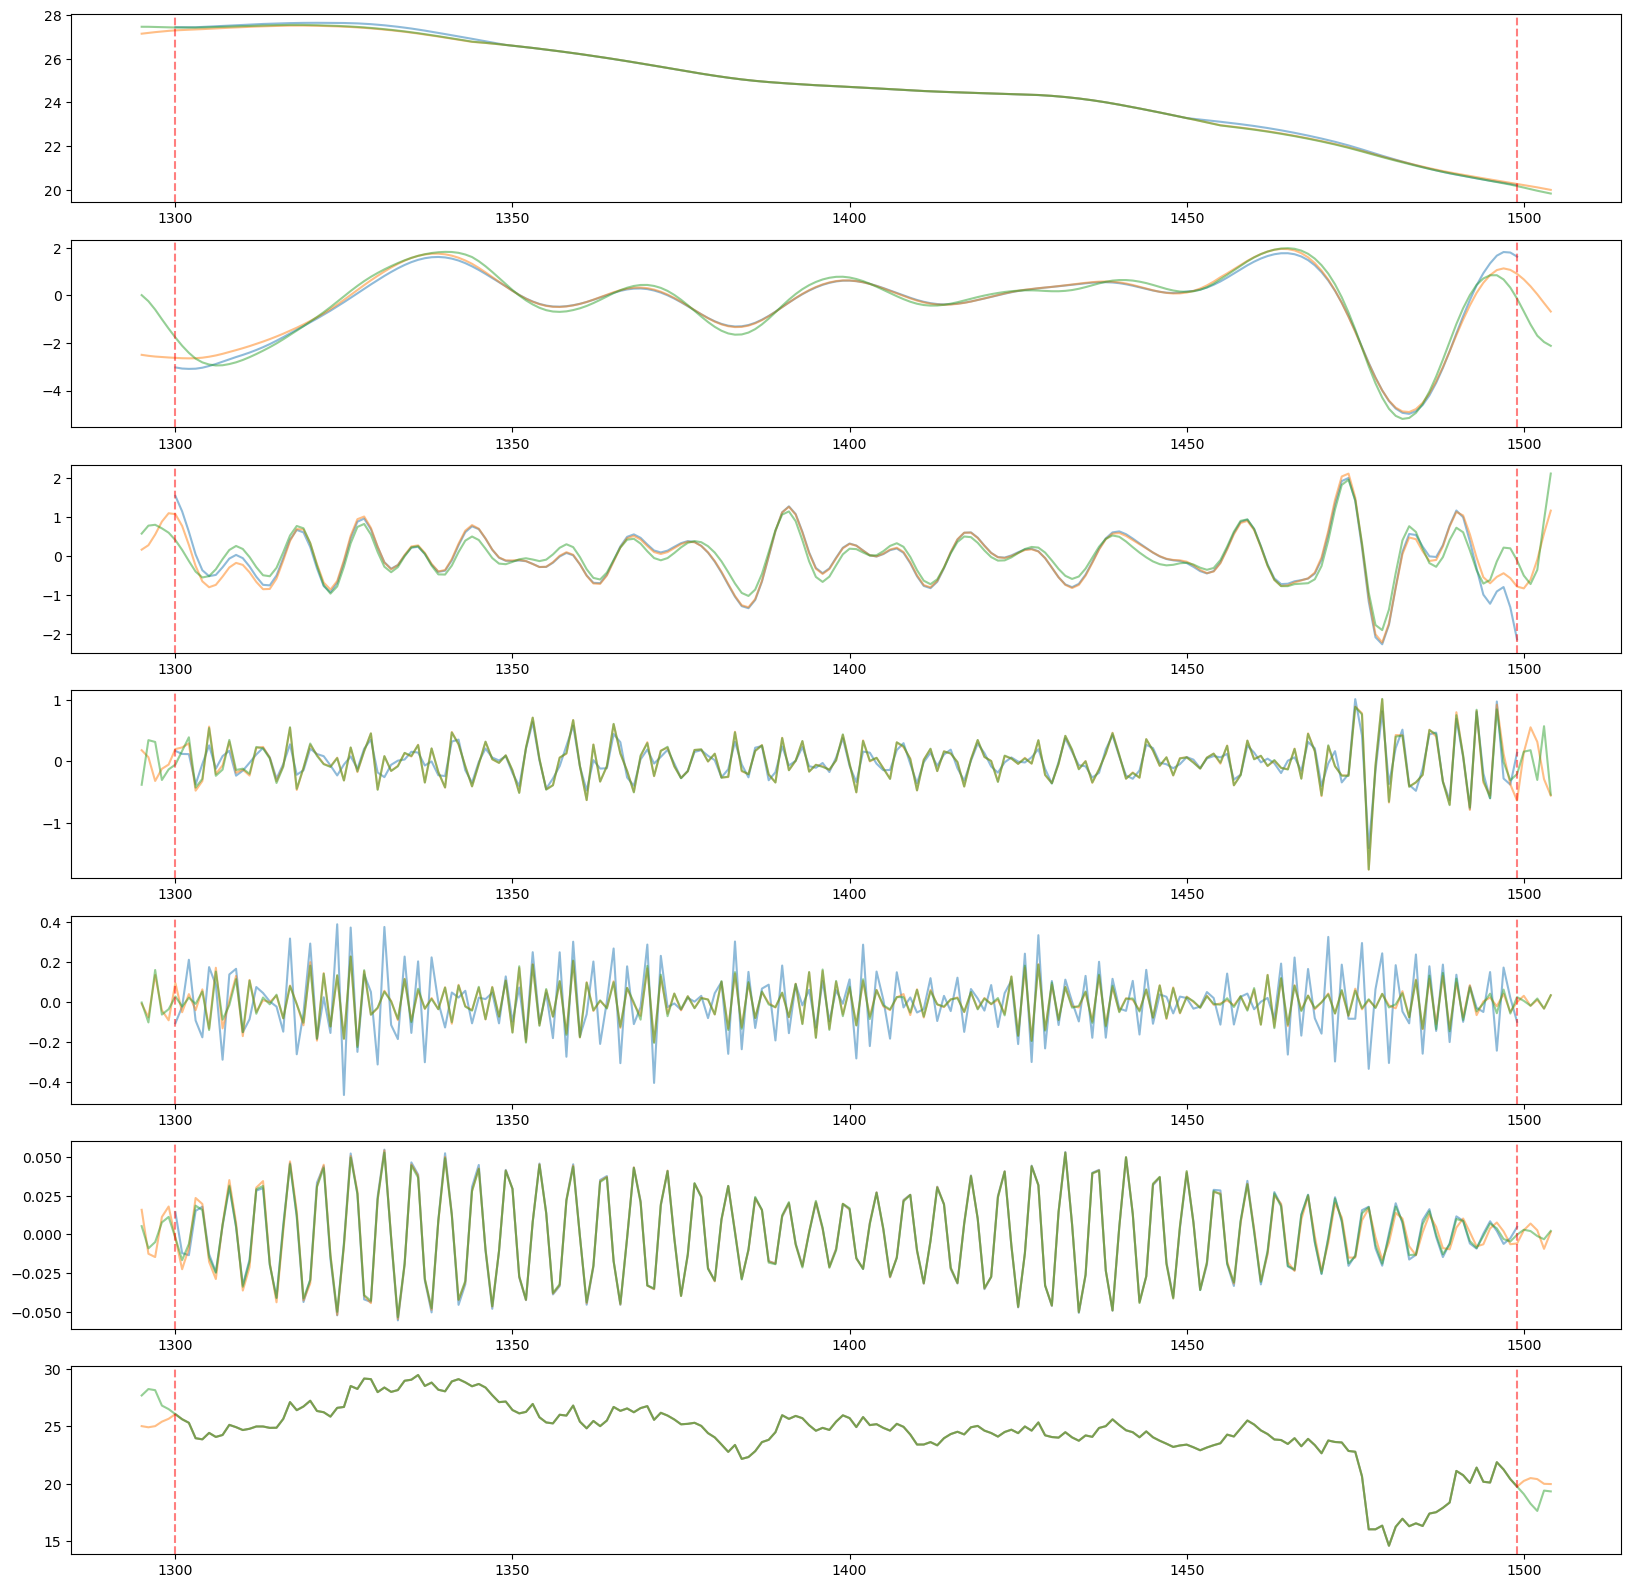

In [5]:
from series_restr import restr_ssa, restr_ssa_ex
n_decomp = 50
n_integr = 6 # 5
ex = 5

# orig series
start, end = 1300, 1500 # 1100, 1300 # 1500, 1700
x_series = range(start, end)
series = y[x_series]
reconstr = restr_ssa(series, n_decomp, n_integr)

# extend from orig series
x_series_ex = range(start-ex, end+ex)
series1 = y[x_series_ex]
reconstr1 = restr_ssa(series1, n_decomp, n_integr)
# reconstr1 = reconstr1[:,ex:-ex]

# extend with symmetry
endpt = series[-1]
tail = series[-ex-1:-1]
tail_symm = 2*endpt - tail[::-1]
startpt = series[0]
head = series[1:ex+1]
head_symm = 2*startpt - head[::-1]
series2 = np.concatenate((head_symm, series, tail_symm))
reconstr2 = restr_ssa(series2, n_decomp, n_integr)
# reconstr2 = reconstr2[:,ex:-ex]

# reconstr2 = restr_ssa_ex(series, ex, n_decomp, n_integr)


plt.figure(figsize=(20,20))
for i in range(n_integr):
    plt.subplot(n_integr+1, 1, i+1)
    plt.plot(x_series,    reconstr[i], alpha=0.5)
    plt.plot(x_series_ex, reconstr1[i], alpha=0.5)
    plt.plot(x_series_ex, reconstr2[i], alpha=0.5)
    plt.axvline(x_series[0], c='r', ls='--', alpha=0.5)
    plt.axvline(x_series[-1], c='r', ls='--', alpha=0.5)
plt.subplot(n_integr+1,1,i+2)
plt.plot(x_series,    np.sum(reconstr, axis=0), alpha=0.5)
plt.plot(x_series_ex, np.sum(reconstr1, axis=0), alpha=0.5)
plt.plot(x_series_ex, np.sum(reconstr2, axis=0), alpha=0.5)
plt.axvline(x_series[0], c='r', ls='--', alpha=0.5)
plt.axvline(x_series[-1], c='r', ls='--', alpha=0.5)

In [61]:
# plt.plot(x_series,    reconstr[2], alpha=0.5)
# plt.plot(x_series_ex, reconstr1[2], alpha=0.5)
# plt.plot(x_series_ex, reconstr2[1], alpha=0.5)
# plt.axvline(x_series[0], c='r', ls='--', alpha=0.5)
# plt.axvline(x_series[-1], c='r', ls='--', alpha=0.5)

# Report Plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import *
from series_restr import *

# load data
df = pd.read_excel('data/CCprice.xlsx', sheet_name='Sheet1')
y = np.array(df['C_Price'])
series = y[1500:1700]

In [2]:
def plot_sigs_and_spec(decomp_method, imfs, orig=None, res=None):

    norig = 1 if orig is not None else 0
    nres = 1 if res is not None else 0
    nrow = norig + len(imfs) + nres

    fig, axes = plt.subplots(nrow, 2, figsize=(10,10))

    # orig
    if orig is not None:
        # time
        ax = axes[0][0]
        ax.set_title(decomp_method)
        ax.plot(orig, 'r')
        ax.set_ylabel('orig')
        # freq
        ax = axes[0][1]
        ax.set_title('spectrum')
        yfft = np.fft.fftshift(np.fft.fft(orig))
        ax.plot(yfft, 'r')

    # imfs / modes / pfs
    for i in range(len(imfs)):
        # time
        ax = axes[i+norig][0]
        ax.plot(imfs[i], 'g')
        ax.set_ylabel('S%d' %(i+1))
        # freq
        ax = axes[i+norig][1]
        yfft = np.fft.fftshift(np.fft.fft(imfs[i]))
        ax.plot(yfft, 'g')

    # res
    if res is not None:  
        # time
        ax = axes[-1][0]
        ax.plot(res, 'g')
        ax.set_ylabel('res')
        # freq
        ax = axes[-1][1]
        yfft = np.fft.fftshift(np.fft.fft(res))
        ax.plot(yfft, 'g')

    ax = axes[-1][0]
    ax.set_xlabel("Time")
    ax = axes[-1][1]
    ax.set_xlabel("Freq")    

    plt.tight_layout()
    plt.show()
    return


## CEEMDAN

c:\Anaconda3\envs\torch37\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


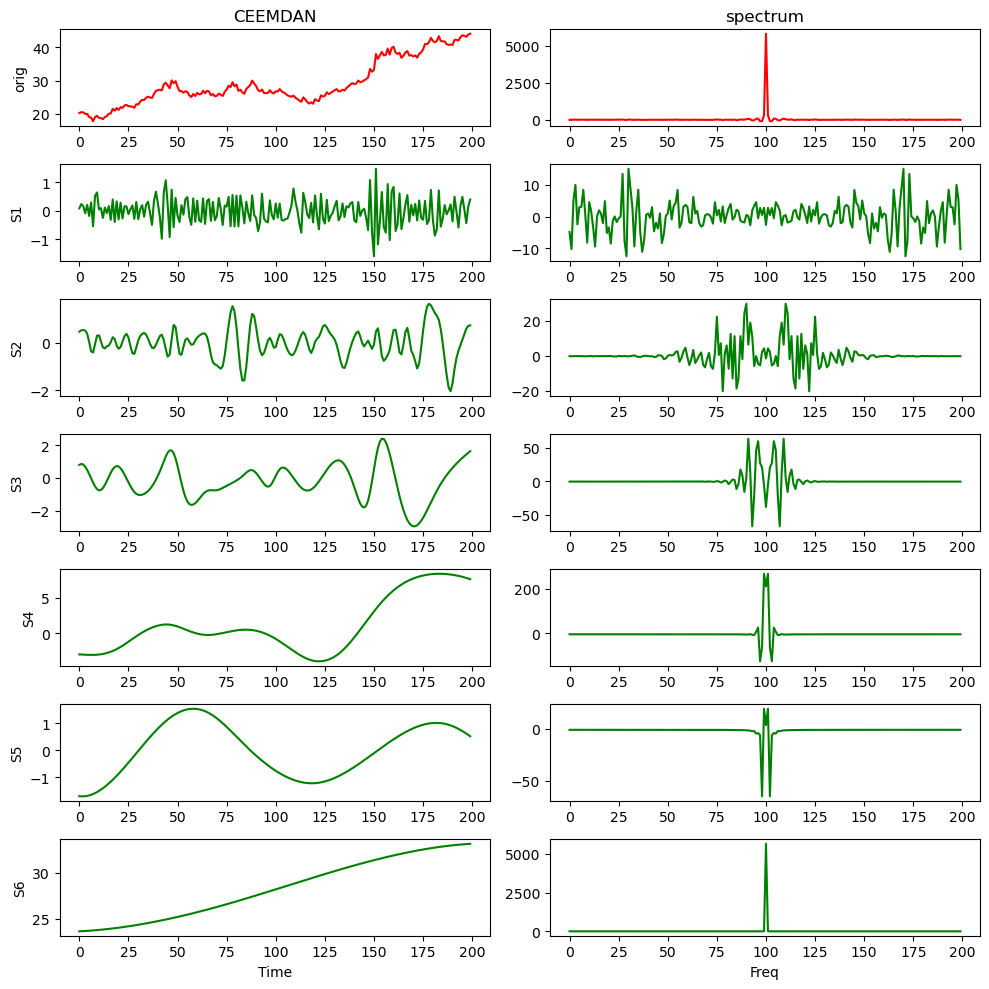

In [3]:
imfs = decomp_ceemdan(series)
plot_sigs_and_spec('CEEMDAN', imfs, series, None)

2.5246774277490926e-15
2.7404298600226993e-15


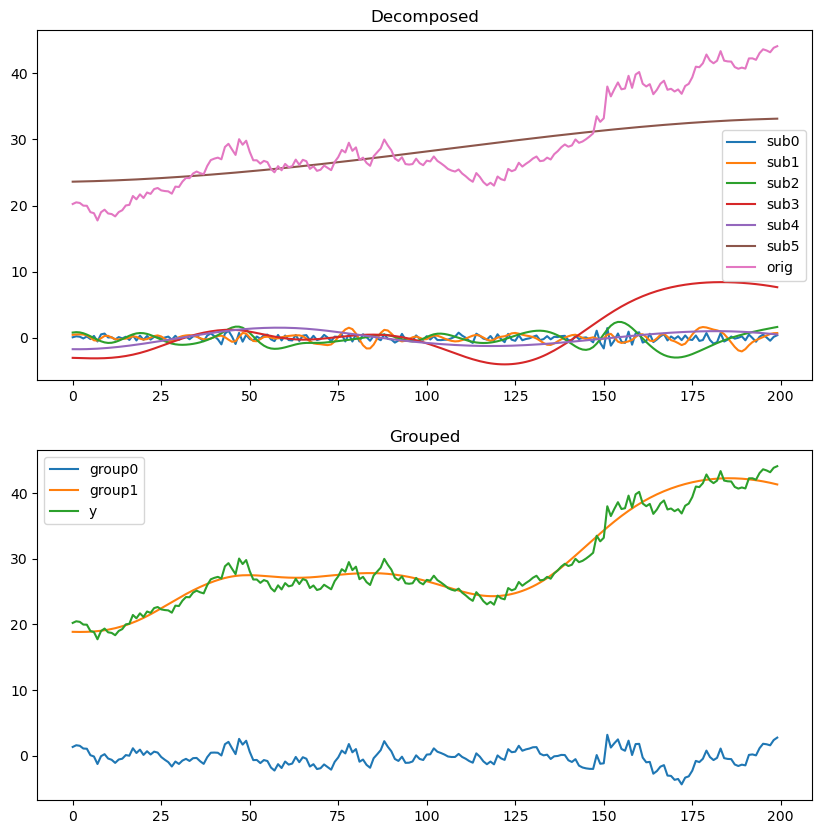

In [4]:
# fine-to-coarse reconstruction
reconstr = integr_fine_to_coarse(imfs)
vis_restr(imfs, reconstr, series)

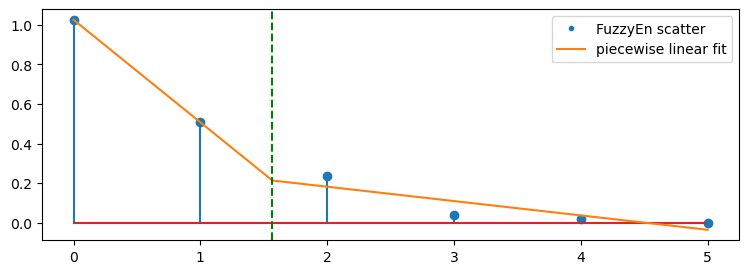

2.5246774277490926e-15
3.014577520672848e-15


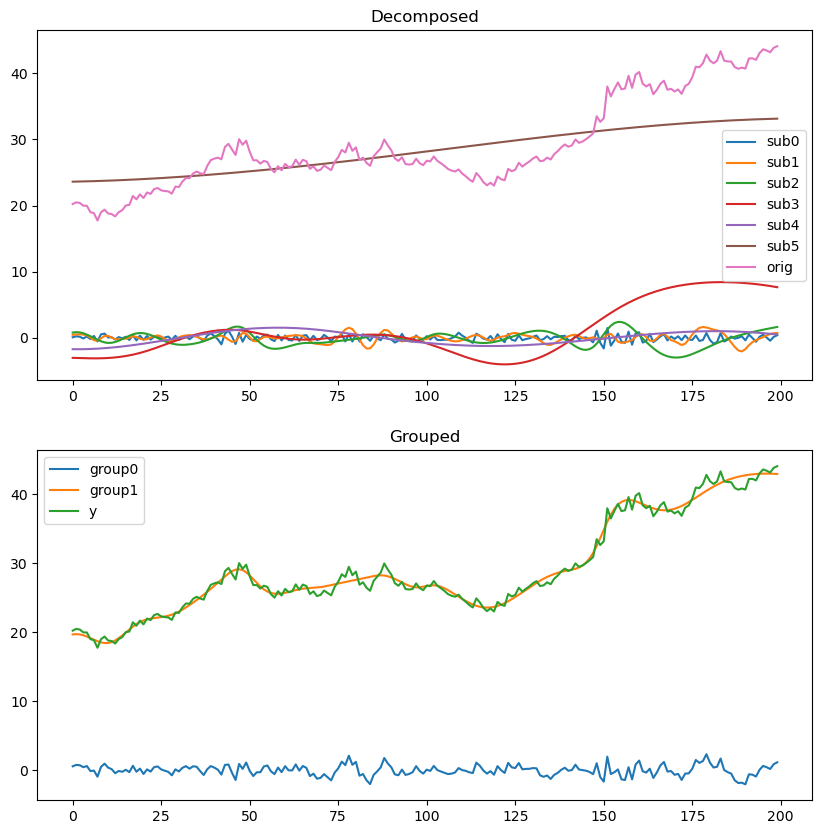

In [5]:
reconstr = integr_fuzzen_pwlf(imfs, n_integr=2, vis=True)
vis_restr(imfs, reconstr, series)

## VMD

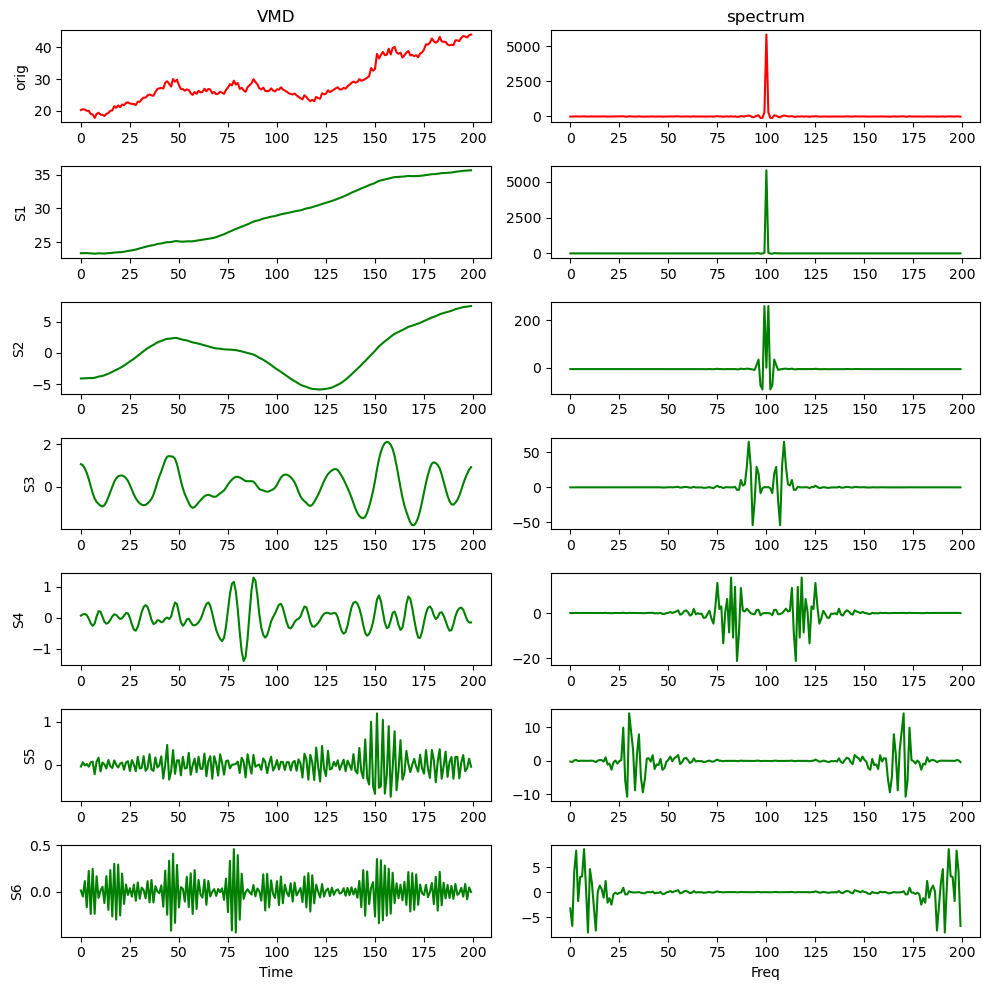

In [7]:
imfs = decomp_vmd(series, n_decomp=6)
plot_sigs_and_spec('VMD', imfs, series)

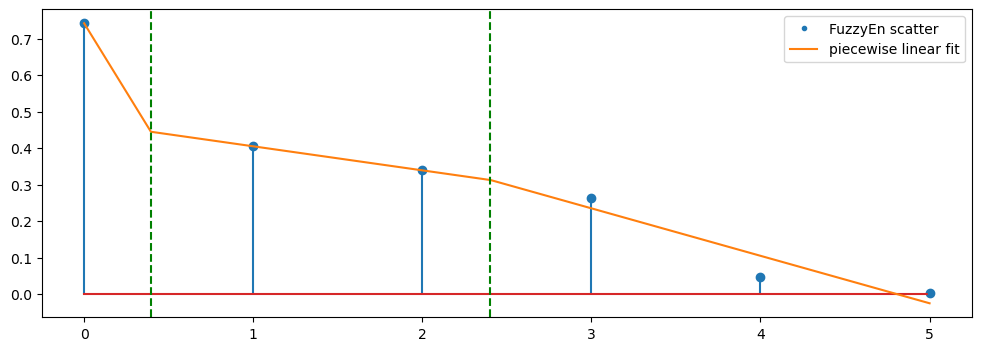

0.17625282763947822
0.1762528276394781


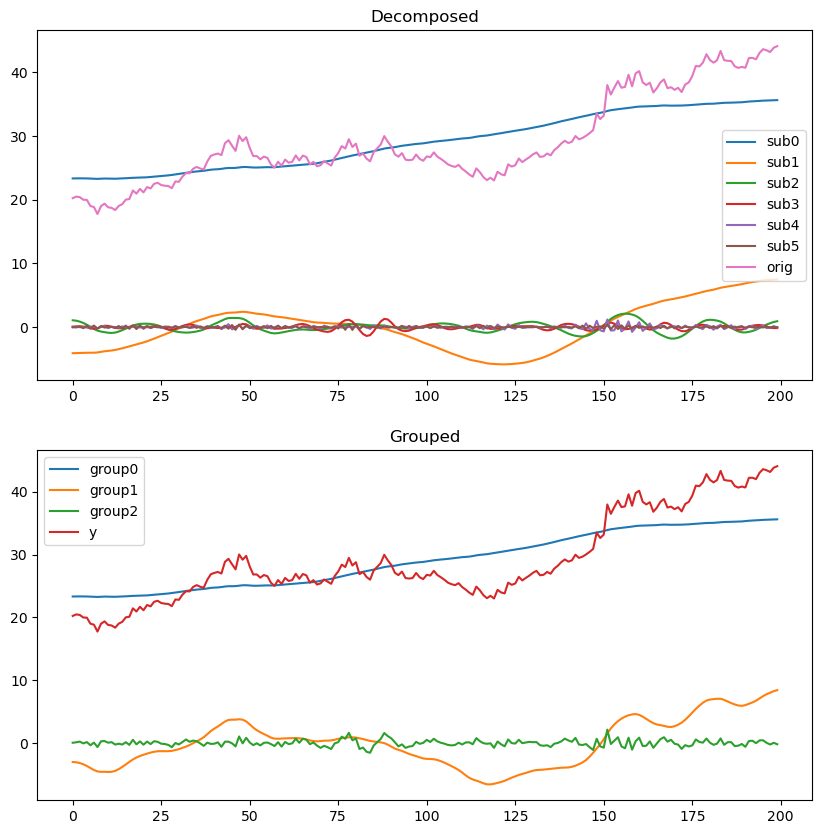

In [16]:
reconstr = integr_fuzzen_pwlf(imfs, n_integr=3, vis=True)
vis_restr(imfs, reconstr, series)

## SSA

c:\Anaconda3\envs\torch37\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


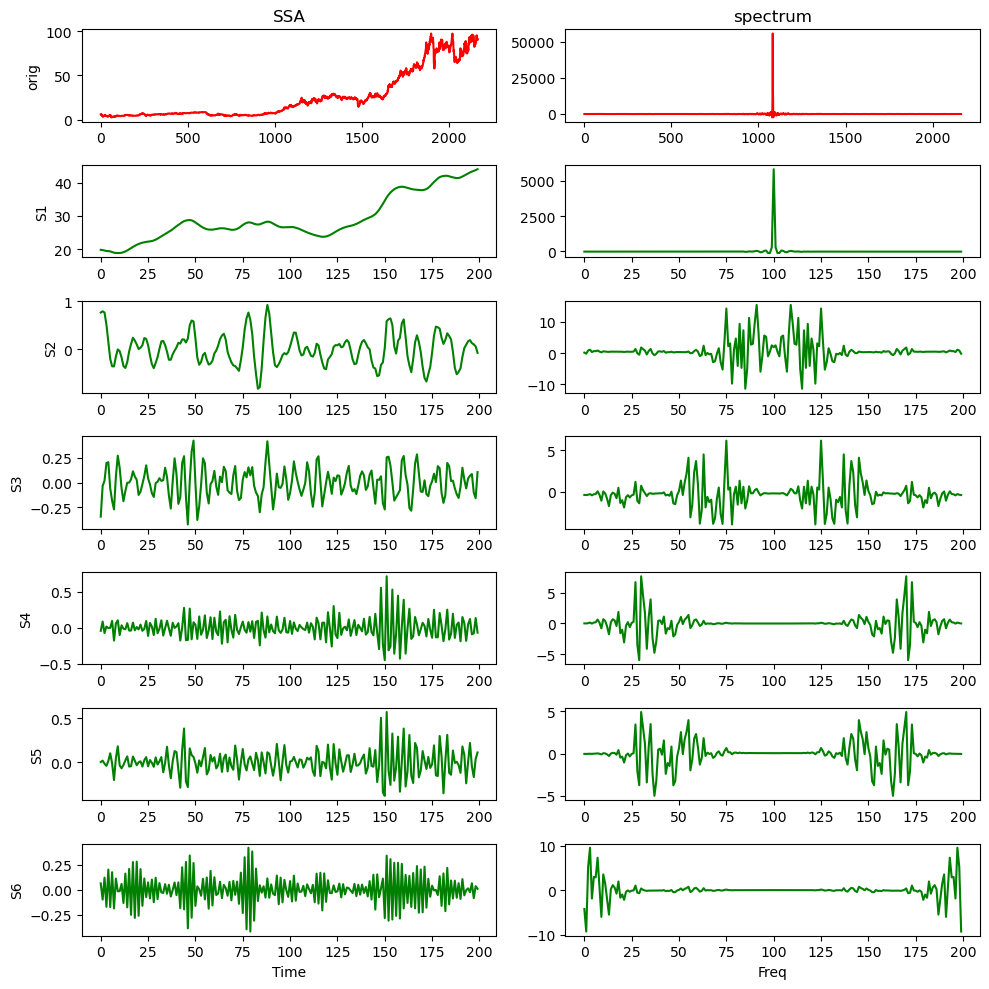

In [6]:
from ssa import SSA

# decompose with ssa
n_decomp = 6
ssa = SSA(series, n_decomp)
# ssa.denoising()

imfs = np.array(ssa.components_to_df()).T
plot_sigs_and_spec('SSA', imfs, y, None)

c:\Anaconda3\envs\torch37\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


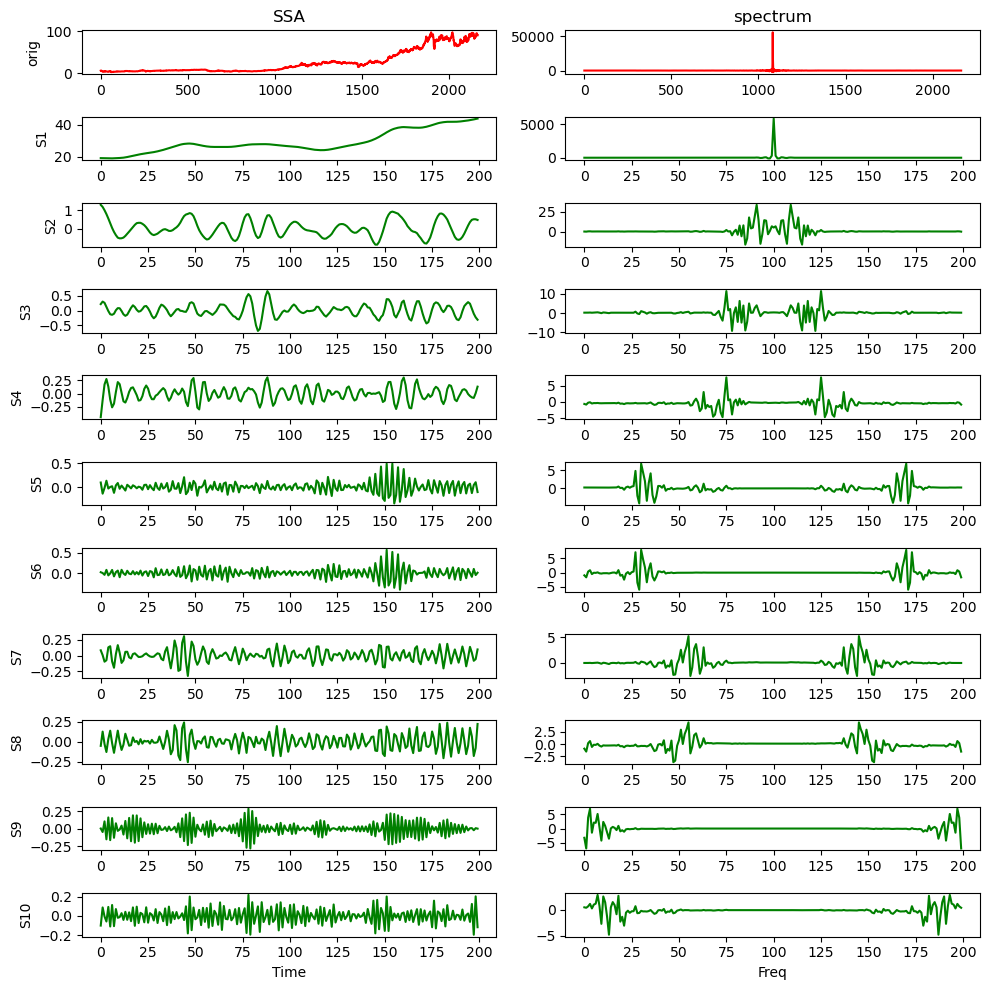

2.435033428336451e-13
2.4349984400735135e-13


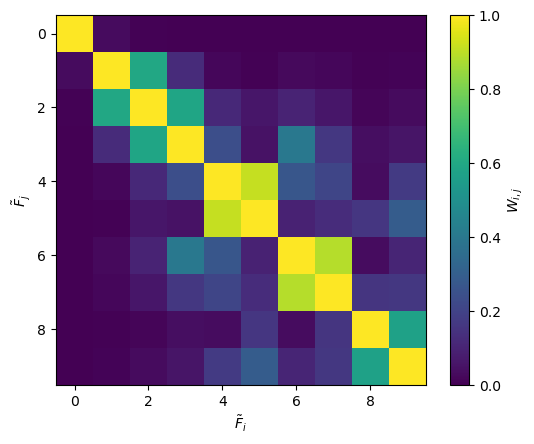

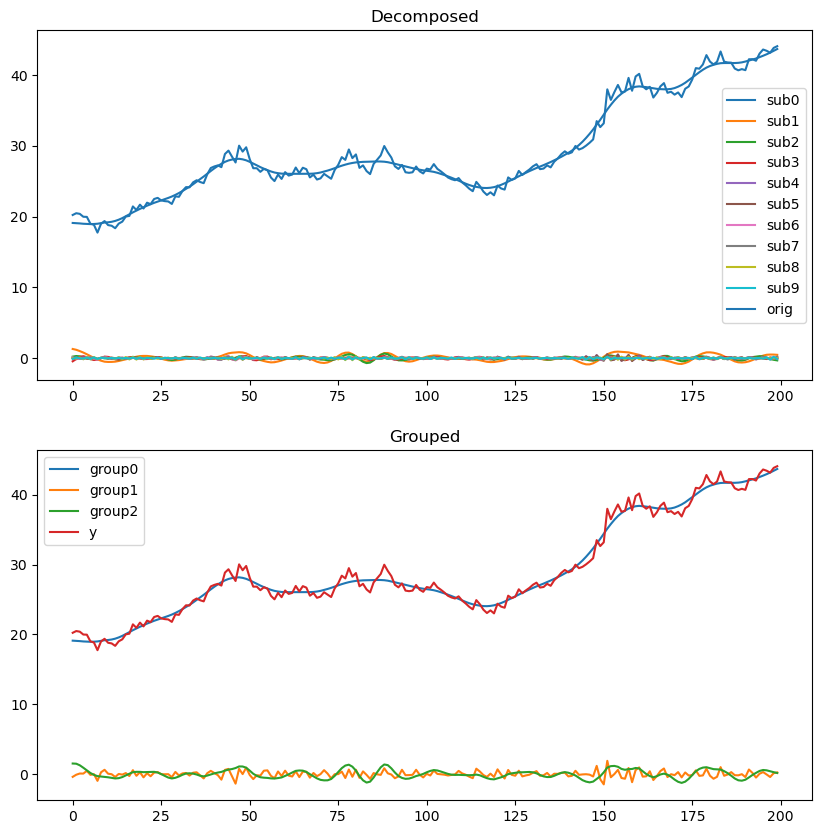

In [13]:
from ssa import SSA

# decompose with ssa
n_decomp = 10
ssa = SSA(series, n_decomp)
imfs = np.array(ssa.components_to_df()).T
plot_sigs_and_spec('SSA', imfs, y, None)

ssa.plot_wcorr()

reconstr = restr_ssa(series, n_decomp, n_integr=3, vis=True)

In [11]:
reconstr.shape

(3, 200)

In [ ]:


def plot_sigs_and_spec(decomp_method, imfs, orig=None, res=None):

    norig = 1 if orig is not None else 0
    nres = 1 if res is not None else 0
    nrow = norig + len(imfs) + nres

    fig, axes = plt.subplots(nrow, 2, figsize=(10,10))

    # orig
    if orig is not None:
        # time
        ax = axes[0][0]
        ax.set_title(decomp_method)
        ax.plot(orig, 'r')
        ax.set_ylabel('orig')
        # freq
        ax = axes[0][1]
        ax.set_title('spectrum')
        yfft = np.fft.fftshift(np.fft.fft(orig))
        ax.plot(yfft, 'r')

    # imfs / modes / pfs
    for i in range(len(imfs)):
        # time
        ax = axes[i+norig][0]
        ax.plot(imfs[i], 'g')
        ax.set_ylabel('S%d' %(i+1))
        # freq
        ax = axes[i+norig][1]
        yfft = np.fft.fftshift(np.fft.fft(imfs[i]))
        ax.plot(yfft, 'g')

    # res
    if res is not None:  
        # time
        ax = axes[-1][0]
        ax.plot(res, 'g')
        ax.set_ylabel('res')
        # freq
        ax = axes[-1][1]
        yfft = np.fft.fftshift(np.fft.fft(res))
        ax.plot(yfft, 'g')

    ax = axes[-1][0]
    ax.set_xlabel("Time")
    ax = axes[-1][1]
    ax.set_xlabel("Freq")    

    plt.tight_layout()
    plt.show()
    return

# SARIMAX

In [1]:
import warnings
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sarimax import ADF_ACF_PACF, sweepSARIMAX, bestSARIMAX, plotPrediction

c:\Anaconda3\envs\torch37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1366 entries, 2017-01-09 to 2023-04-18
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1366 non-null   int64  
 1   C_Price     1366 non-null   float64
 2   E_Price     1366 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 42.7 KB
None


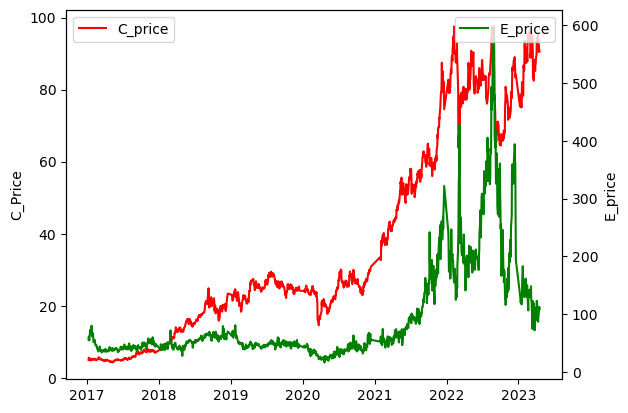

In [2]:
# load data
df = pd.read_excel('./testdata/CCprice.xlsx', sheet_name='Sheet1')
df = df.set_index('Date')
df.index = pd.DatetimeIndex(df.index)
df.index.freq = df.index.inferred_freq
date_col = df.index

# overview of data
print(df.info())
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(date_col, df['C_Price'], 'r', label='C_price')
ax1.legend(loc=2)
ax1.set_ylabel('C_Price')
ax2 = ax1.twinx() # this is the important function
ax2.plot(date_col, df['E_Price'], 'g', label='E_price')
ax2.legend(loc=1)
ax2.set_ylabel('E_price')
plt.show()

>>> orig series <<<
Results of Dickey-Fuller Test:
Test Statistic                   -0.024422
p-value                           0.956465
#Lags Used                       13.000000
Number of Observations Used    1352.000000
Critical Value (1%)              -3.435196
Critical Value (5%)              -2.863680
Critical Value (10%)             -2.567909
dtype: float64


c:\Anaconda3\envs\torch37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


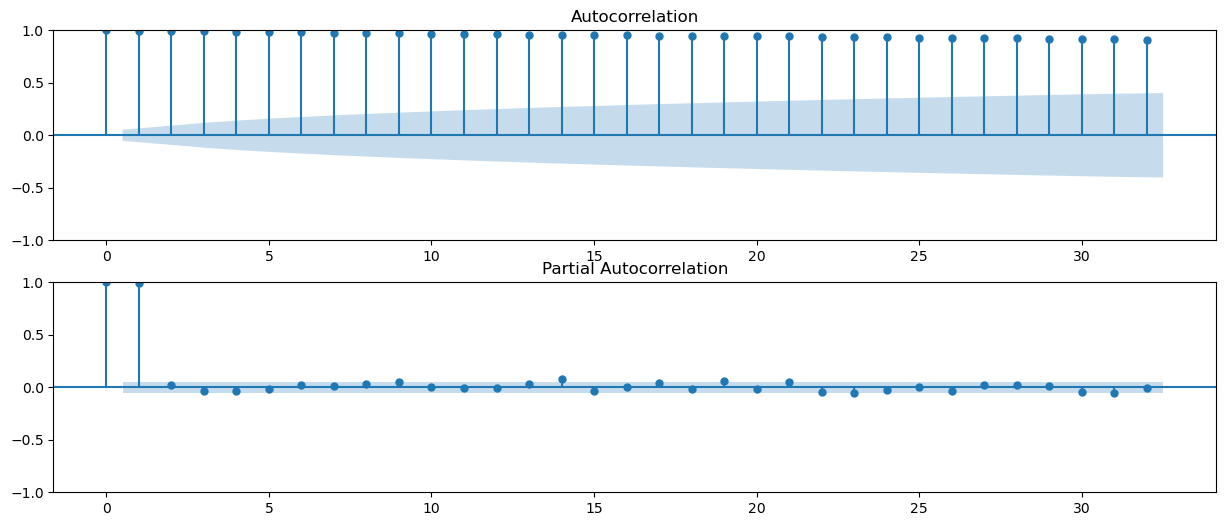

In [3]:
print('>>> orig series <<<')
ADF_ACF_PACF(df['C_Price'])

>>> diff(1) <<<
Results of Dickey-Fuller Test:
Test Statistic                -1.245385e+01
p-value                        3.526463e-23
#Lags Used                     1.200000e+01
Number of Observations Used    1.352000e+03
Critical Value (1%)           -3.435196e+00
Critical Value (5%)           -2.863680e+00
Critical Value (10%)          -2.567909e+00
dtype: float64


c:\Anaconda3\envs\torch37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


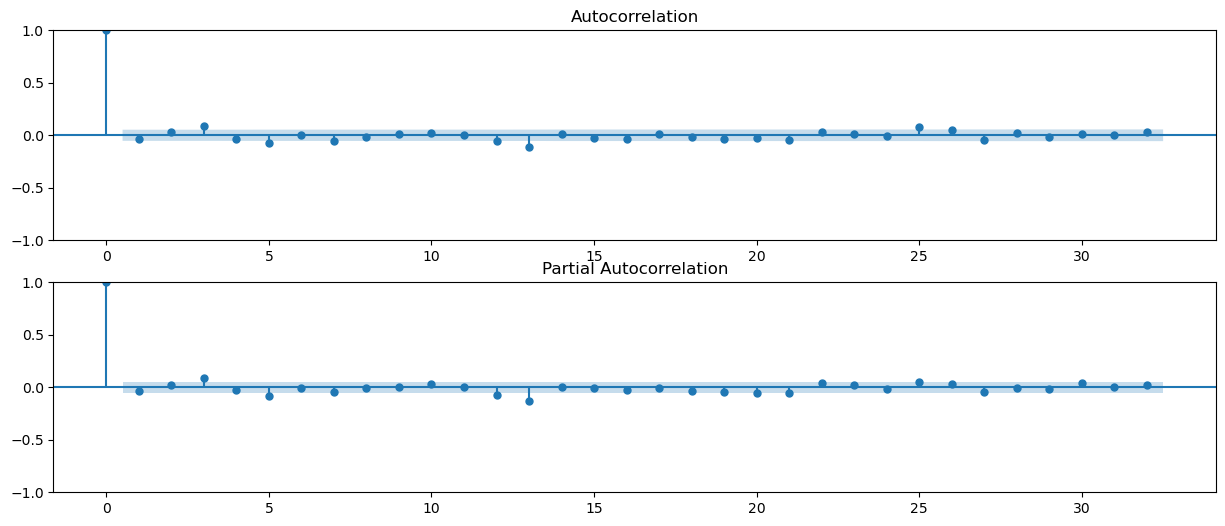

In [4]:
print('>>> diff(1) <<<')
ADF_ACF_PACF(df['C_Price'].diff(1).dropna())

There is no seasonal components. 

`diff(1)` produces a stationary series.

Try `ARIMAX(p,d,q)` model for `d=1`

Sweep for the best `p,q`.

In [3]:
# sweep for the best params
endog = df.loc[:, 'C_Price']
exog =  df.loc[:, 'E_Price']
d = 1
ps = range(16)
qs = range(16)
order = (d,ps,qs)
# aic_mat,bic_mat = sweepSARIMAX(endog, order)
# f = open("mat_sarimax.pkl", "wb")
# pickle.dump((aic_mat, bic_mat), f)
# f.close()

In [4]:
# or read from file
f = open("mat_sarimax.pkl", "rb")
aic_mat, bic_mat = pickle.load(f)
f.close()
p,q = bestSARIMAX(aic_mat, bic_mat, 'aic')
warnings.simplefilter('ignore')
model = sm.tsa.statespace.SARIMAX(endog, order=(p,d,q)).fit(disp=False)
print(model.summary())

min aic: 4878.000000, corresponding (p,q): (12,15)
                               SARIMAX Results                                
Dep. Variable:                C_Price   No. Observations:                 1366
Model:             SARIMAX(12, 1, 15)   Log Likelihood               -2411.018
Date:                Wed, 24 May 2023   AIC                           4878.035
Time:                        17:42:38   BIC                           5024.165
Sample:                             0   HQIC                          4932.731
                               - 1366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4284      0.150      2.854      0.004       0.134       0.723
ar.L2          0.2753      0.121      2.269      0.023       0.038       0.513
a

RMSE = 2.148274


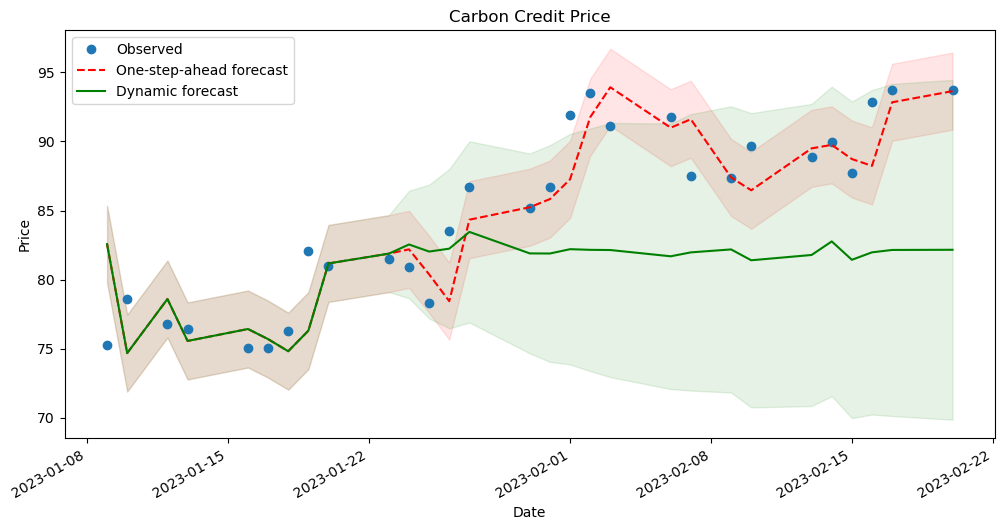

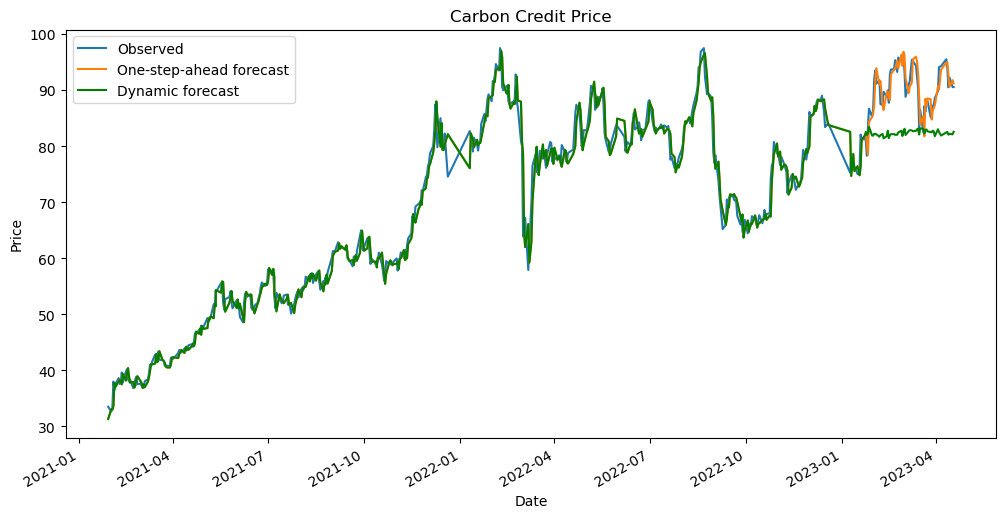

In [5]:
plotPrediction(model, df)